In [ ]:
from os import replace
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy

data = pd.read_csv("/content/sale_tasks_dataset.csv")
print(data.head(5))
print(data.tail(5))
print('\n')
print(data.shape)
print('\n')
print(data.dtypes)

data['age'] = data['age'].apply(lambda x: str(x).replace(',', '.'))
data['age'] = data['age'].astype(float)
data['finish_dttm'] = pd.to_datetime(data['finish_dttm'], errors='coerce')

print('\n')
print(data.dtypes)


   customer_id   age gender_cd region_size  foreign_flg  entrepreneur_flg  \
0    422206773  58.0         F         NaN          NaN               NaN   
1    348648289  44.0         M       rural          0.0               0.0   
2    345496995  23.0         F        town          0.0               0.0   
3    182783192  34.0         M        town          0.0               0.0   
4    138498254  30.0         M         NaN          NaN               NaN   

   auto_flg  traveler_flg  partnership_flg  child_amt  ...  \
0       NaN           NaN              NaN        NaN  ...   
1       0.0           0.0              1.0        1.0  ...   
2       1.0           0.0              1.0        0.0  ...   
3       0.0           0.0              0.0        0.0  ...   
4       NaN           NaN              NaN        NaN  ...   

  state_talk_time_sec wo_hit_status_result_desc  \
0                67.0             Дозвон, Отказ   
1               151.0             Дозвон, Отказ   
2          

In [ ]:
print("Пропущенные значения:\n")
missing = data.isnull().sum()
print(missing)
missing_percent = round((missing / len(data)) * 100, 2)
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent.apply(str) + '%'})
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent', ascending=False))

Пропущенные значения:

customer_id                       0
age                             182
gender_cd                       258
region_size                    7289
foreign_flg                    7289
entrepreneur_flg               7289
auto_flg                       7289
traveler_flg                   7289
partnership_flg                7289
child_amt                      7289
realty_type                    7289
segment_cd                     7289
bundle_nm                     13988
confirmed_income              17284
predicted_income              14604
product_cd                        0
functional_cd                     0
finish_dttm                       0
state_talk_time_sec             148
wo_hit_status_result_desc         0
wo_hit_status_reason_desc         0
employee_id                       0
emp_age                           0
emp_gender_cd                  2180
emp_children_cnt              18605
emp_work_months_cnt               0
emp_citizenship_country_cd    12487
emp_m

Описательная статистика числовых колонок:
        customer_id           age   foreign_flg  entrepreneur_flg  \
count  1.869100e+04  18509.000000  11402.000000      11402.000000   
mean   3.166681e+08     38.033135      0.009647          0.138309   
min    1.423600e+04      8.000000      0.000000          0.000000   
25%    1.828957e+08     29.000000      0.000000          0.000000   
50%    3.436865e+08     37.000000      0.000000          0.000000   
75%    4.334274e+08     46.000000      0.000000          0.000000   
max    6.499757e+08     85.000000      1.000000          1.000000   
std    1.488096e+08     12.405885      0.097751          0.345239   

           auto_flg  traveler_flg  partnership_flg     child_amt  \
count  11402.000000  11402.000000     11402.000000  11402.000000   
mean       0.501666      0.019558         0.790475      0.377741   
min        0.000000      0.000000         0.000000      0.000000   
25%        0.000000      0.000000         1.000000      0.000000

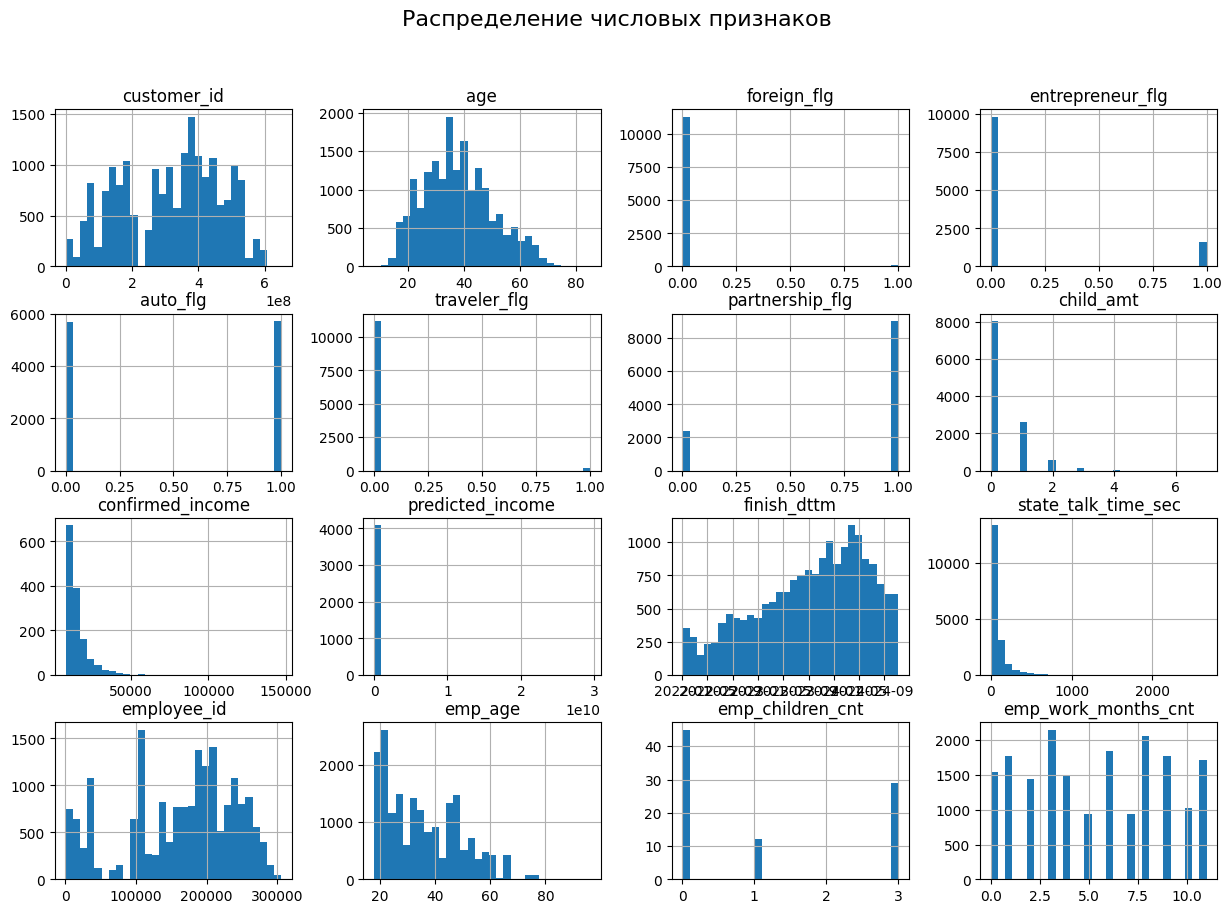

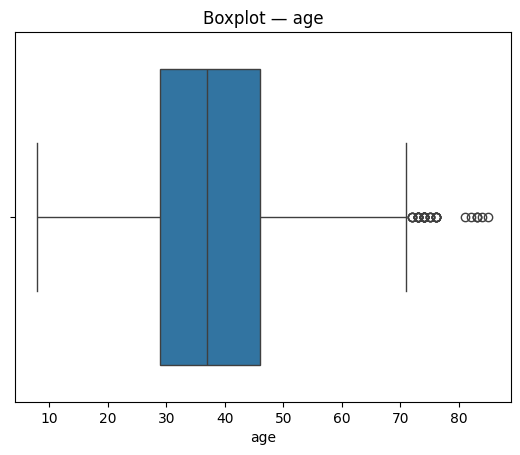

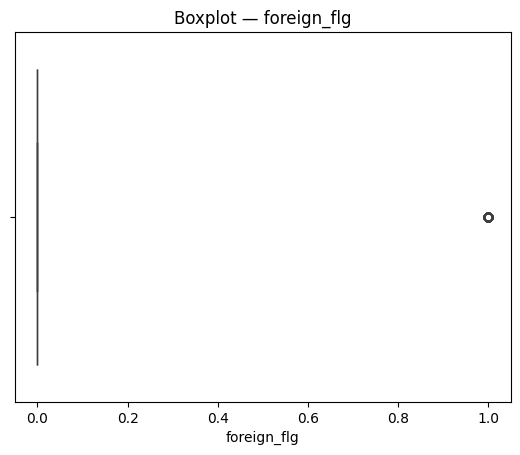

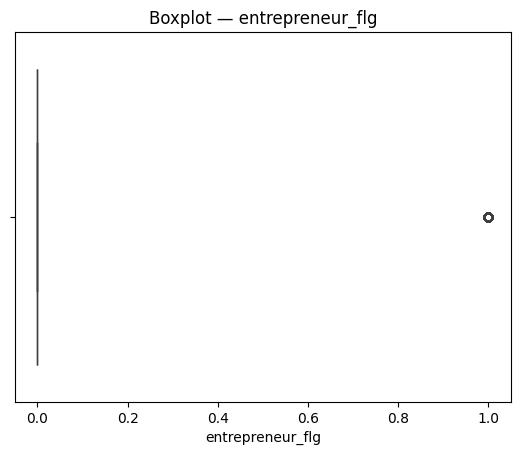

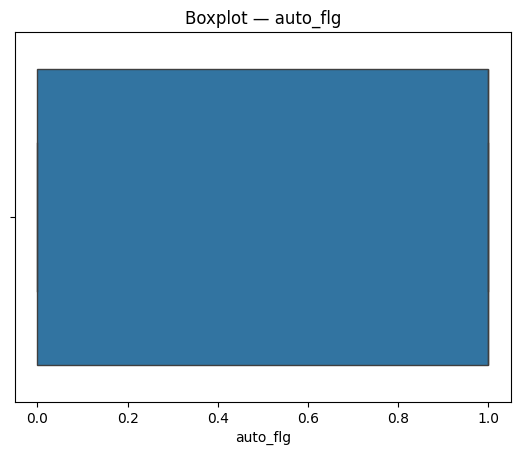

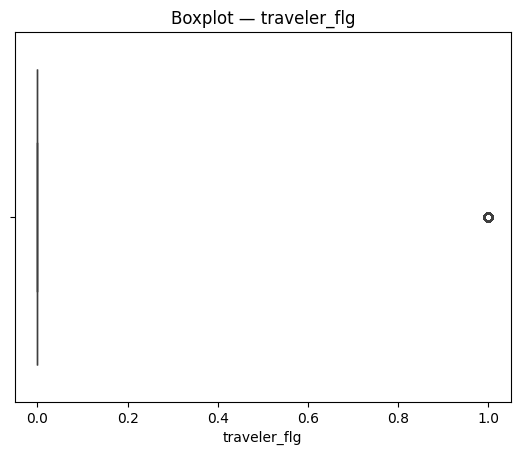

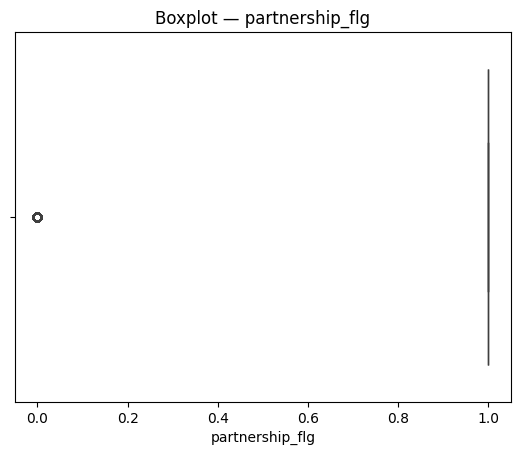

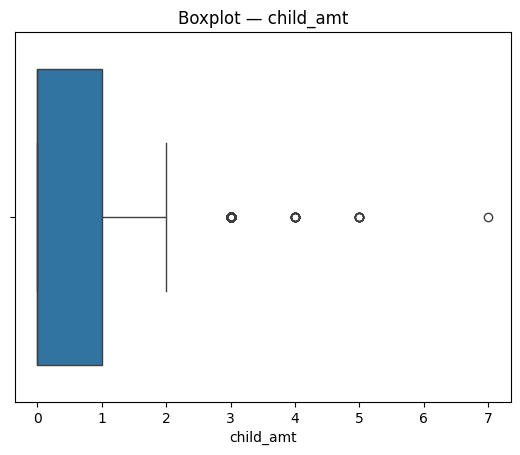

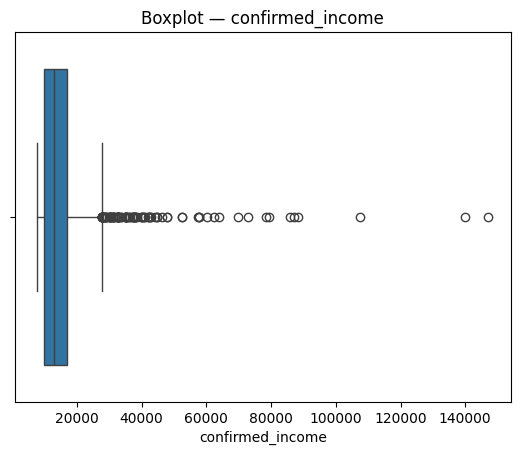

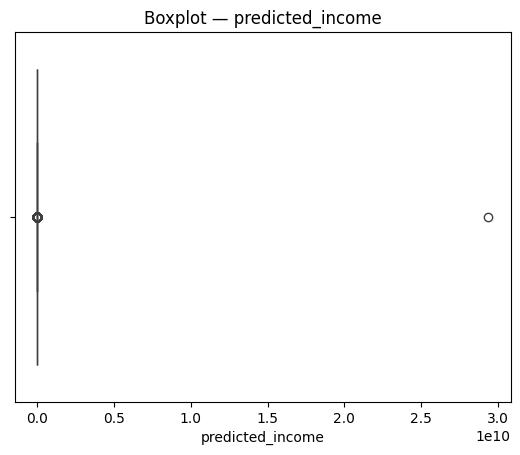

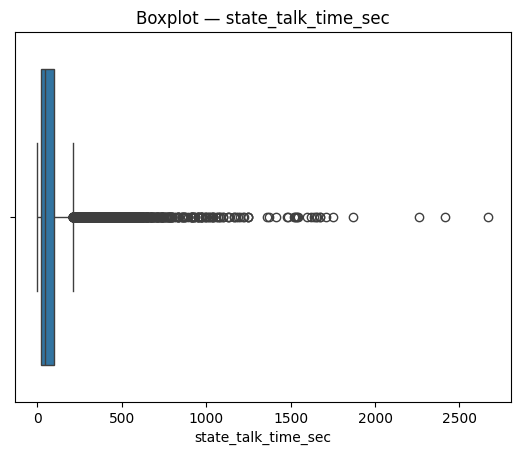

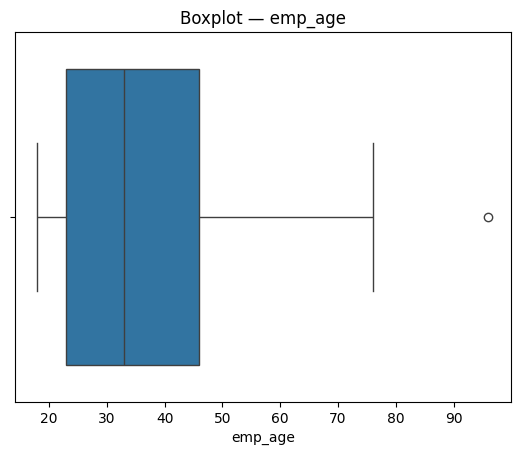

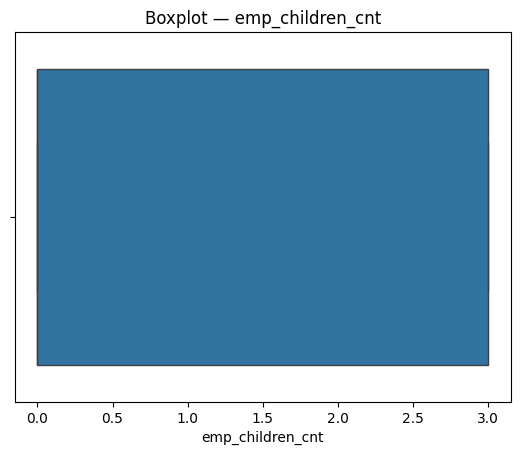

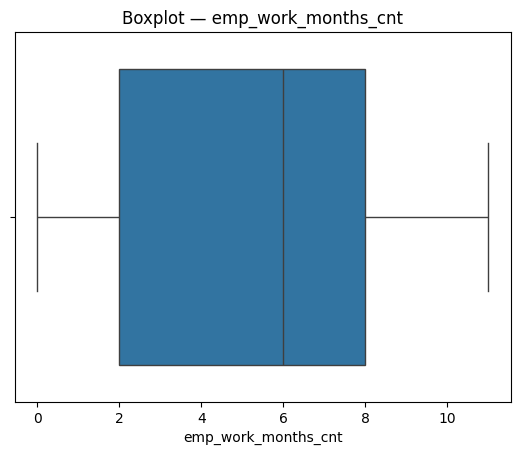

In [ ]:
print("Описательная статистика числовых колонок:")
print(data.describe())

print('\n')
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Распределение числовых признаков", fontsize=16)
plt.show()

num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    if (col!= 'customer_id' and col!= 'employee_id'):
      sns.boxplot(x=data[col])
      plt.title(f"Boxplot — {col}")
      plt.show()



Частоты для категориального признака: gender_cd
gender_cd
M    9881
F    8552
Name: count, dtype: int64


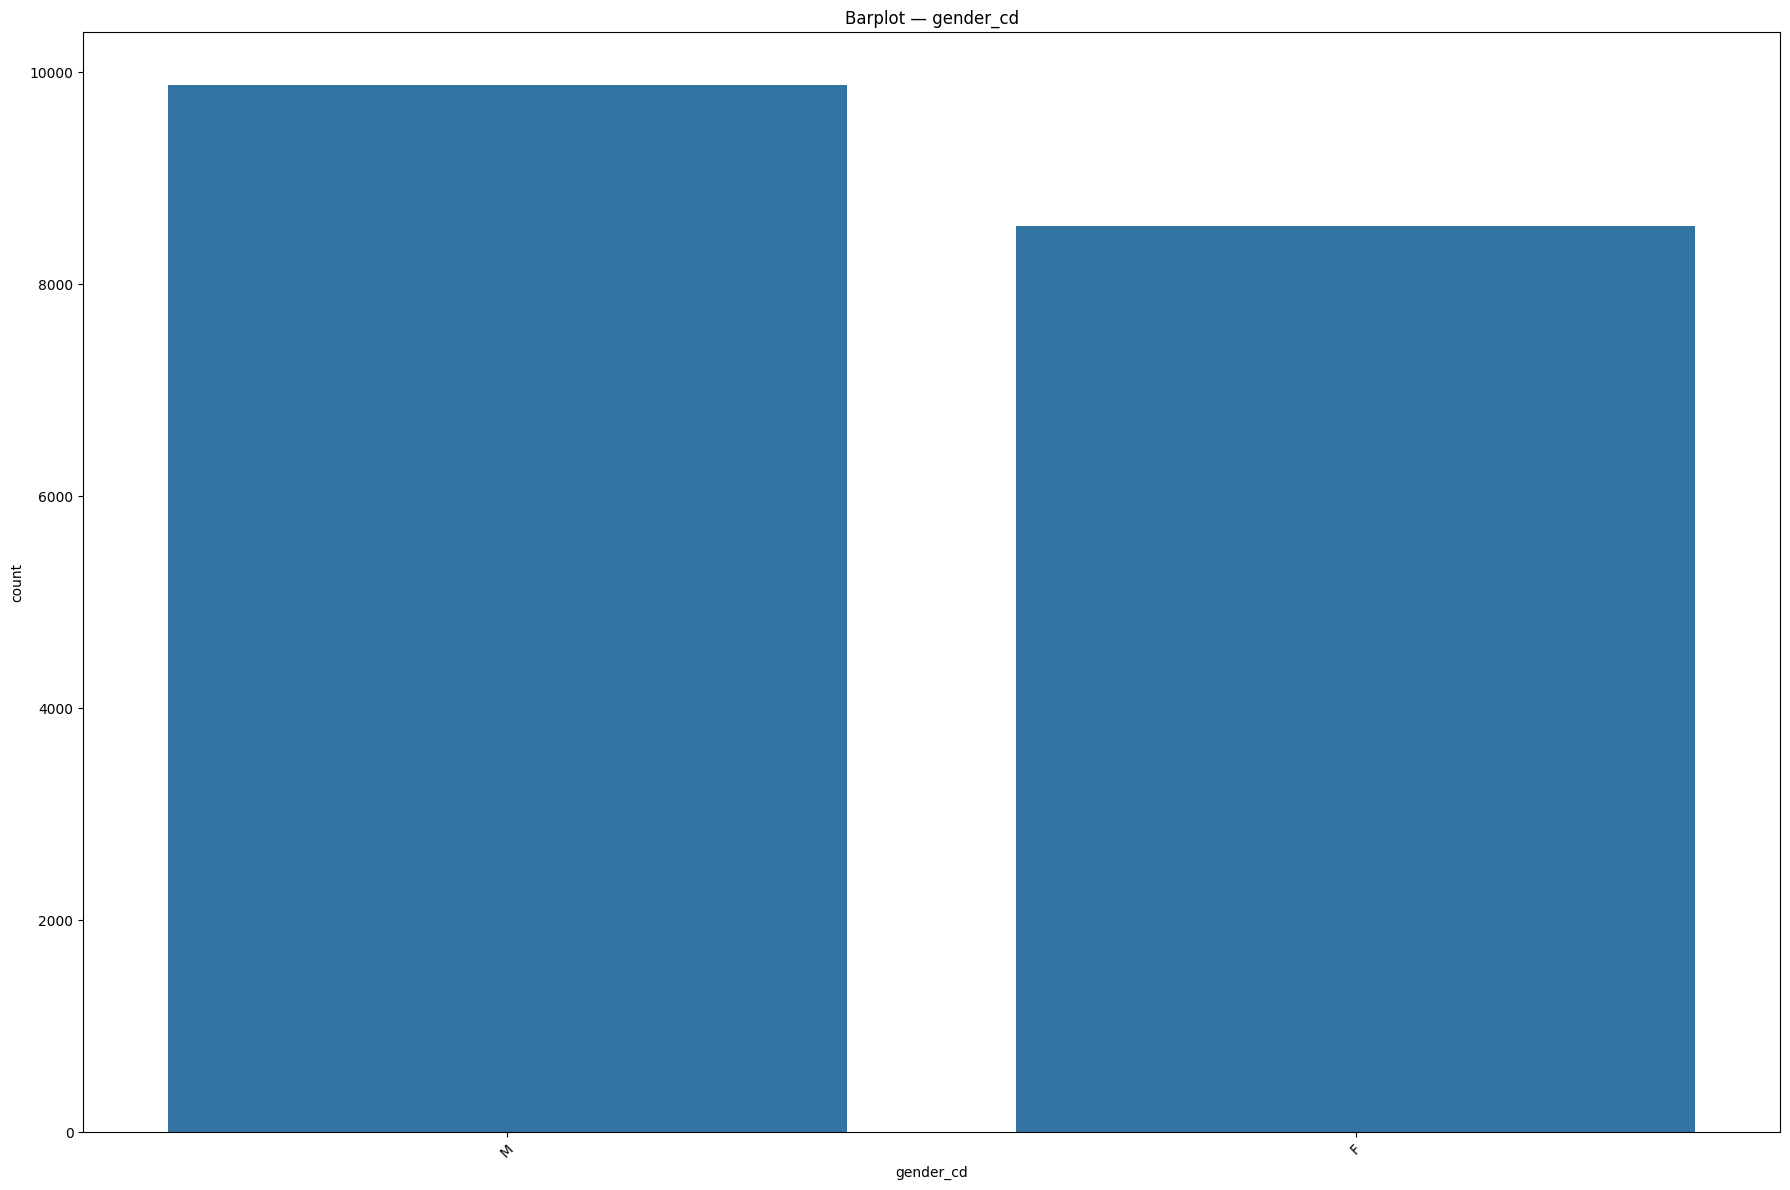


Частоты для категориального признака: region_size
region_size
town     6054
urban    2661
msk      1559
rural    1128
Name: count, dtype: int64


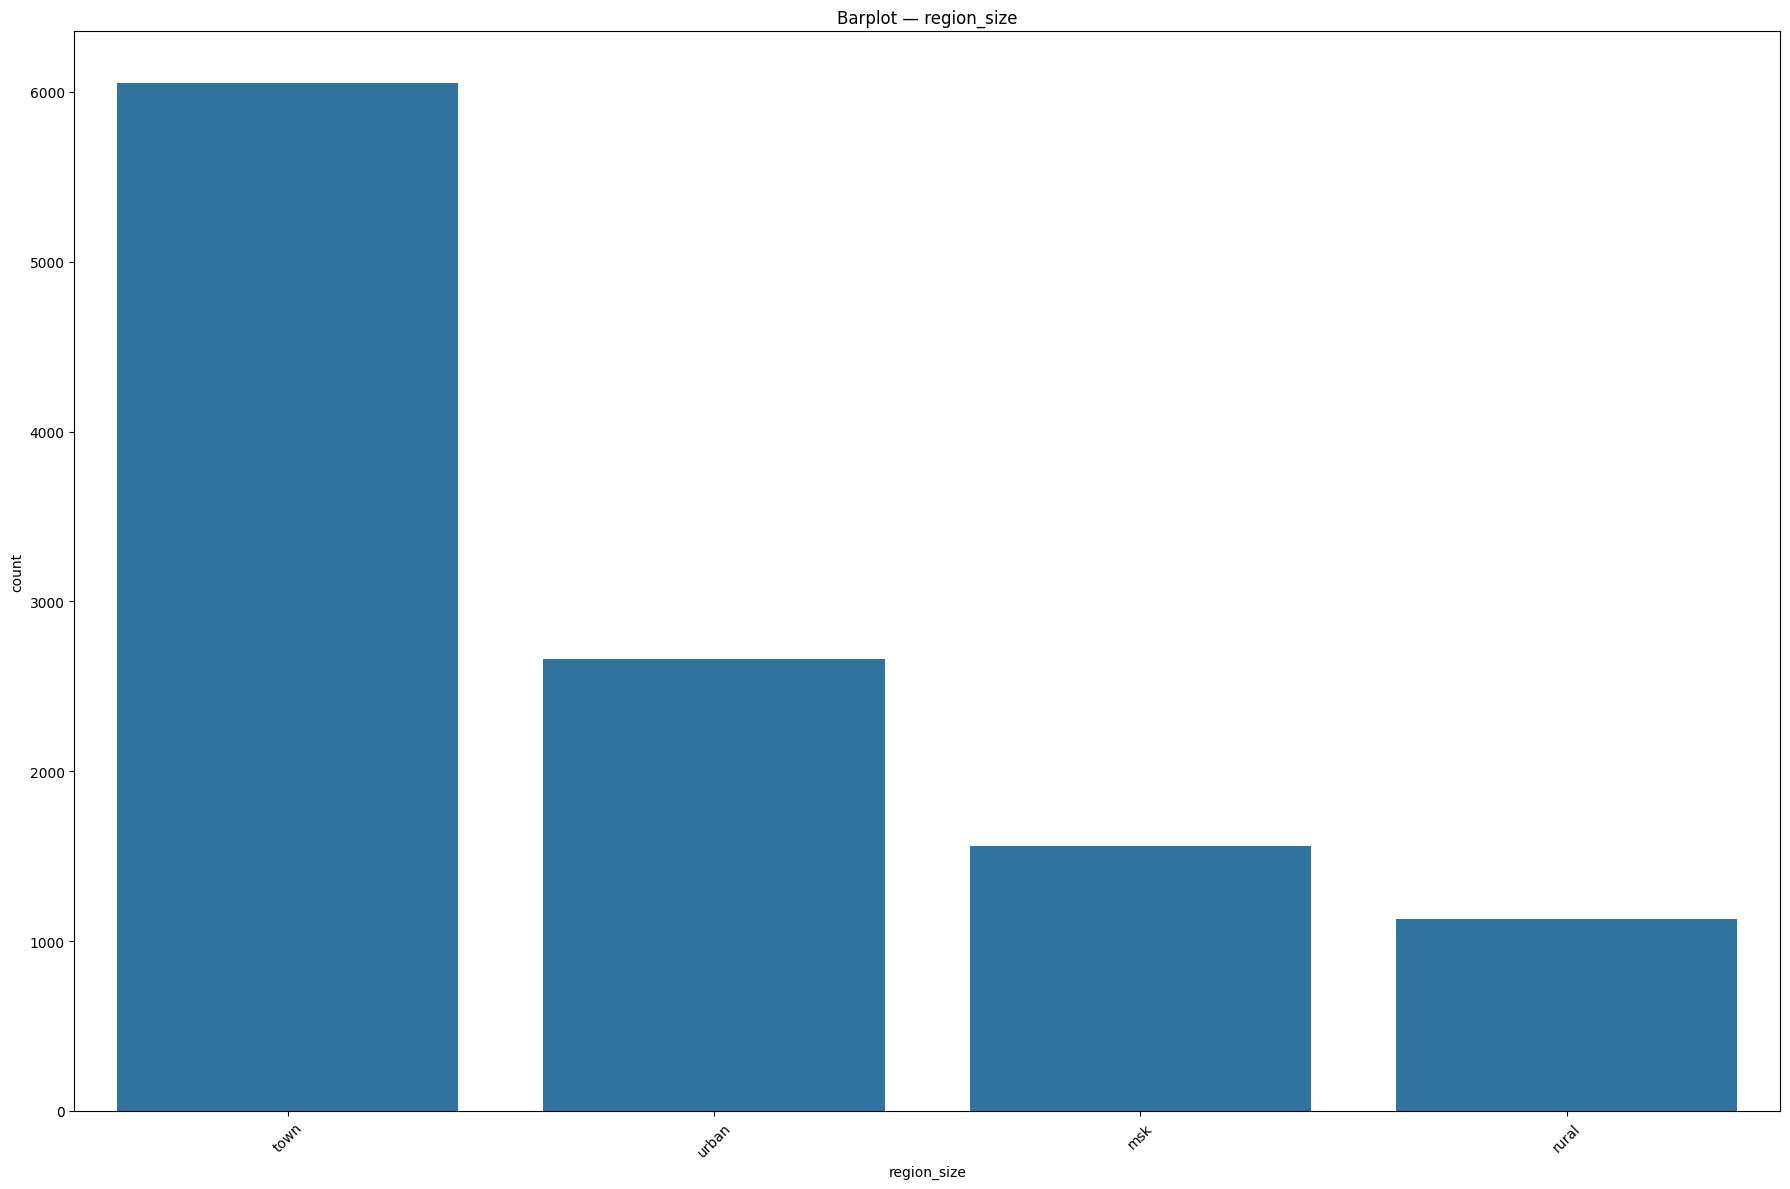


Частоты для категориального признака: realty_type
realty_type
Квартира            5731
Нет своего жилья    5445
Жилой дом            130
Комната               96
Name: count, dtype: int64


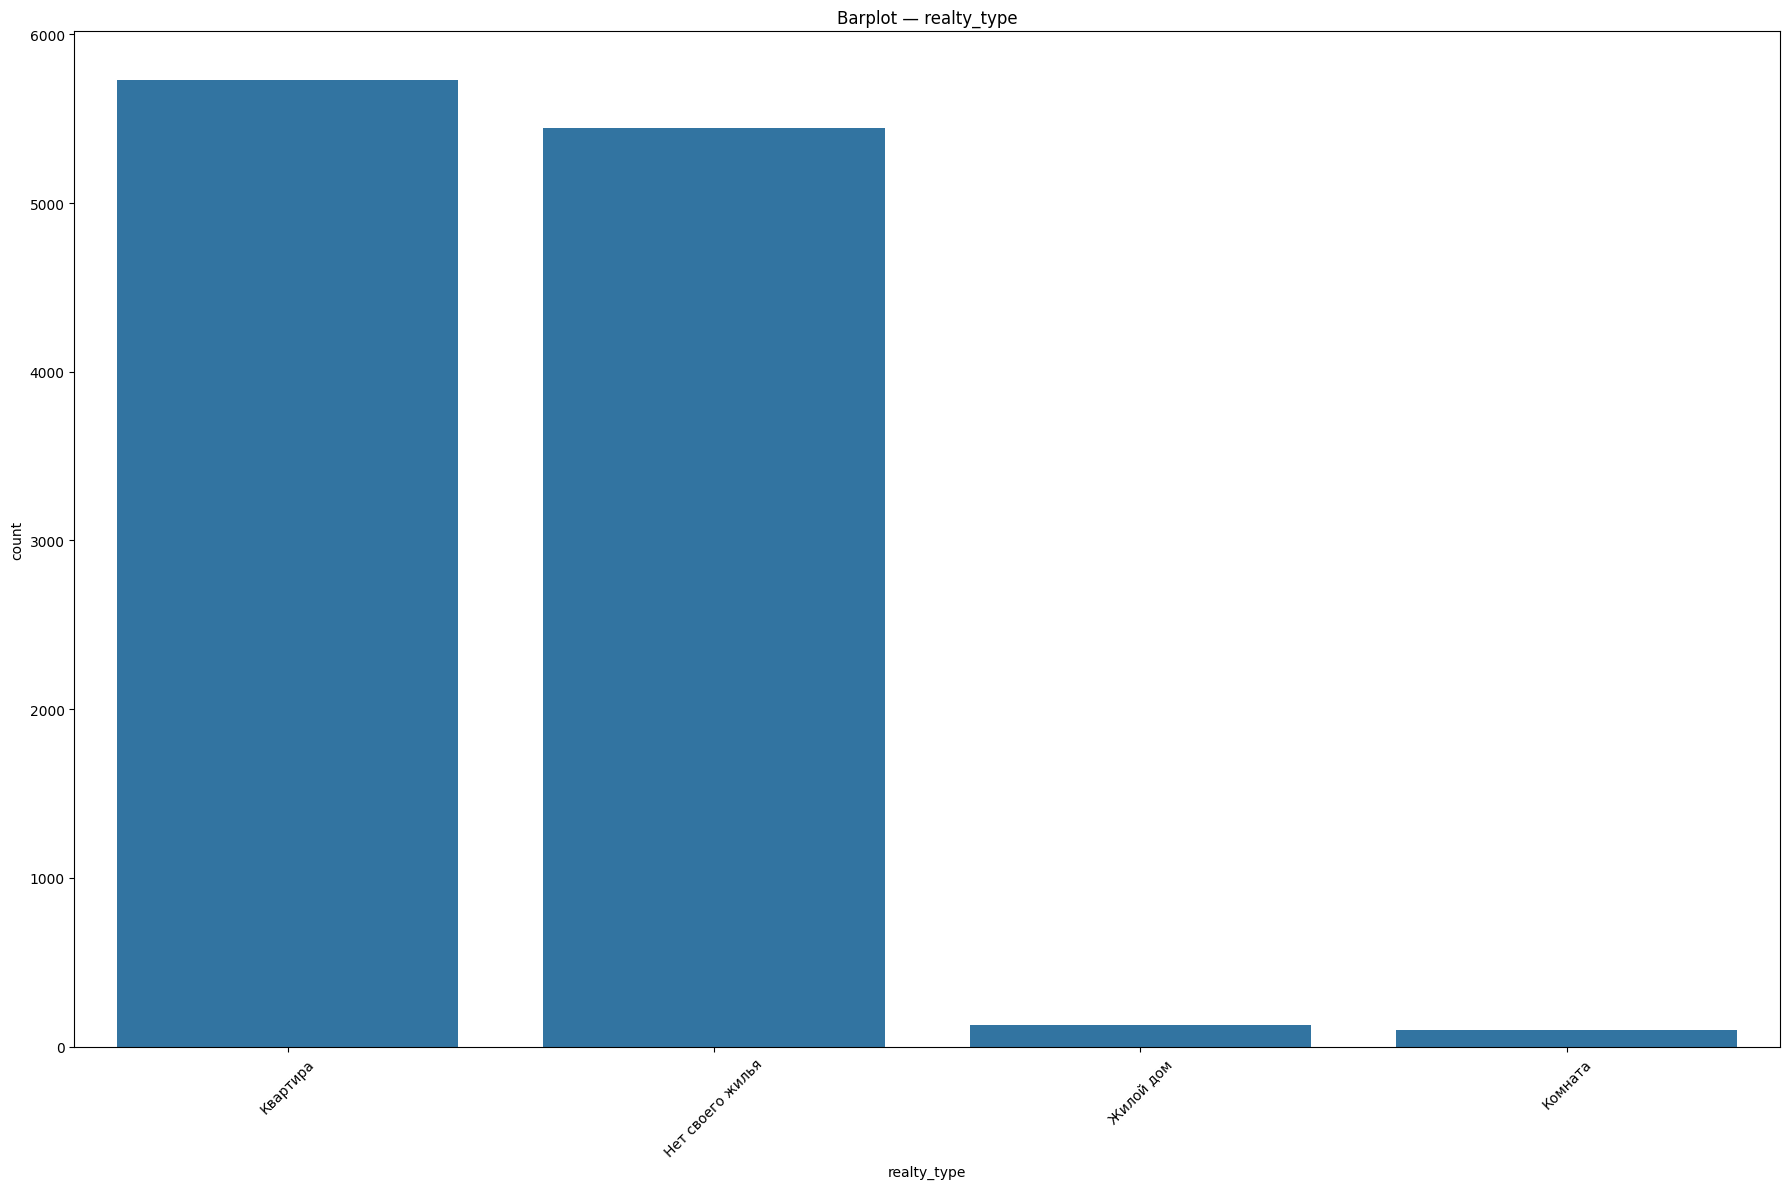


Частоты для категориального признака: segment_cd
segment_cd
t_07 (29)    1014
t_04 (16)     851
t_06 (28)     655
t_05 (19)     600
t_09 (36)     572
t_01 (4)      561
u_07 (27)     426
t_10 (40)     415
t_02 (8)      410
u_04 (14)     372
u_06 (23)     299
t_03 (10)     295
r_03 (20)     265
t_12 (44)     262
m_08 (21)     254
u_05 (17)     249
u_09 (32)     248
t_11 (42)     232
u_02 (5)      220
u_01 (3)      213
m_04 (11)     210
t_08 (30)     187
r_02 (7)      169
m_07 (18)     156
r_04 (22)     156
u_12 (43)     154
u_10 (35)     149
m_10 (26)     148
u_03 (13)     140
m_02 (2)      139
m_11 (34)     127
m_01 (1)      125
r_01 (6)      113
u_11 (39)     111
m_05 (12)     111
m_03 (9)      110
m_06 (15)     101
r_07 (37)      94
r_06 (33)      90
r_08 (38)      87
u_08 (31)      80
m_09 (25)      78
r_05 (24)      63
r_09 (41)      46
r_10 (45)      45
Name: count, dtype: int64


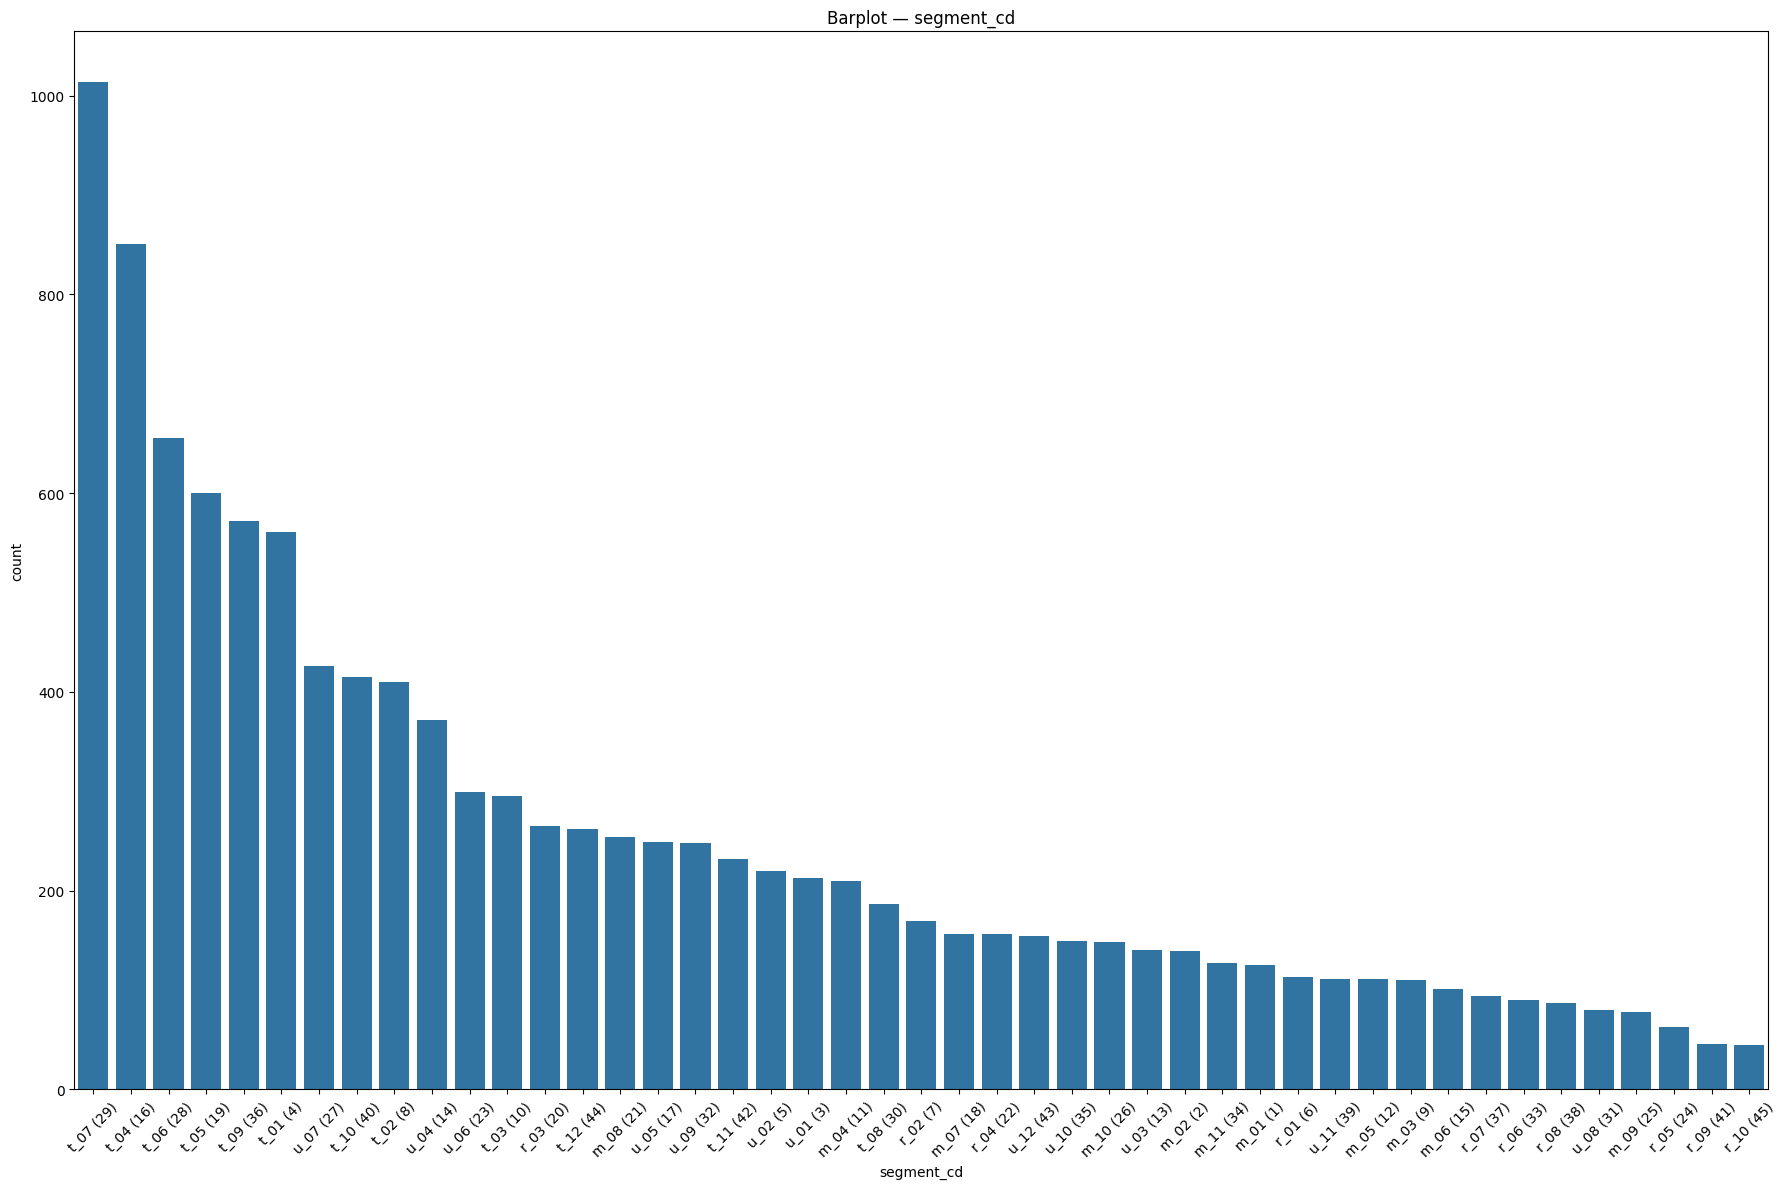


Частоты для категориального признака: bundle_nm
bundle_nm
Pro        4406
Premium     296
XXX           1
Name: count, dtype: int64


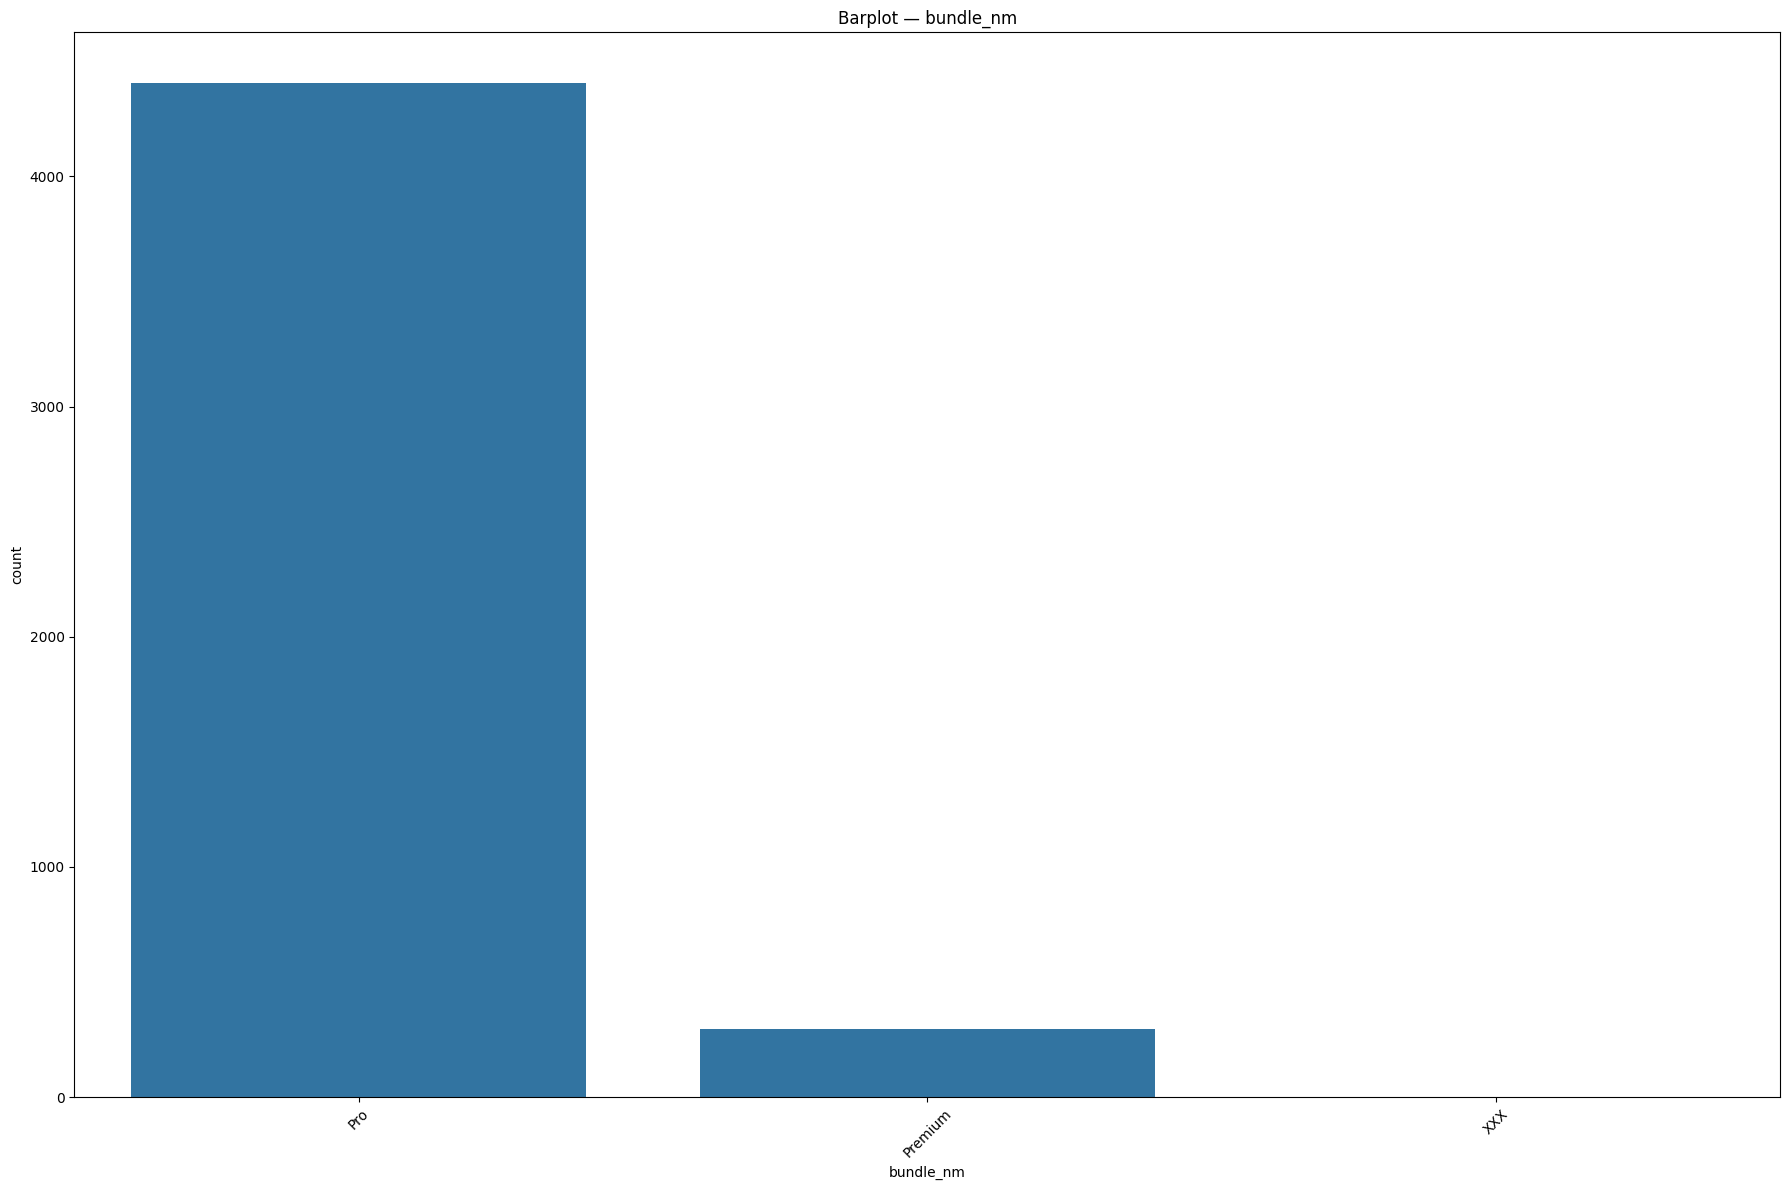


Частоты для категориального признака: product_cd
product_cd
Credit Cards          9840
Cash Loan             2681
MVNO                  1903
Debit Cards           1886
Investment             870
Secured Loan           484
Mortgage Insurance     373
Casco                  320
Car Loan               290
Osago                   26
Deposit                 11
Travel Avia              5
T-Auto                   2
Name: count, dtype: int64


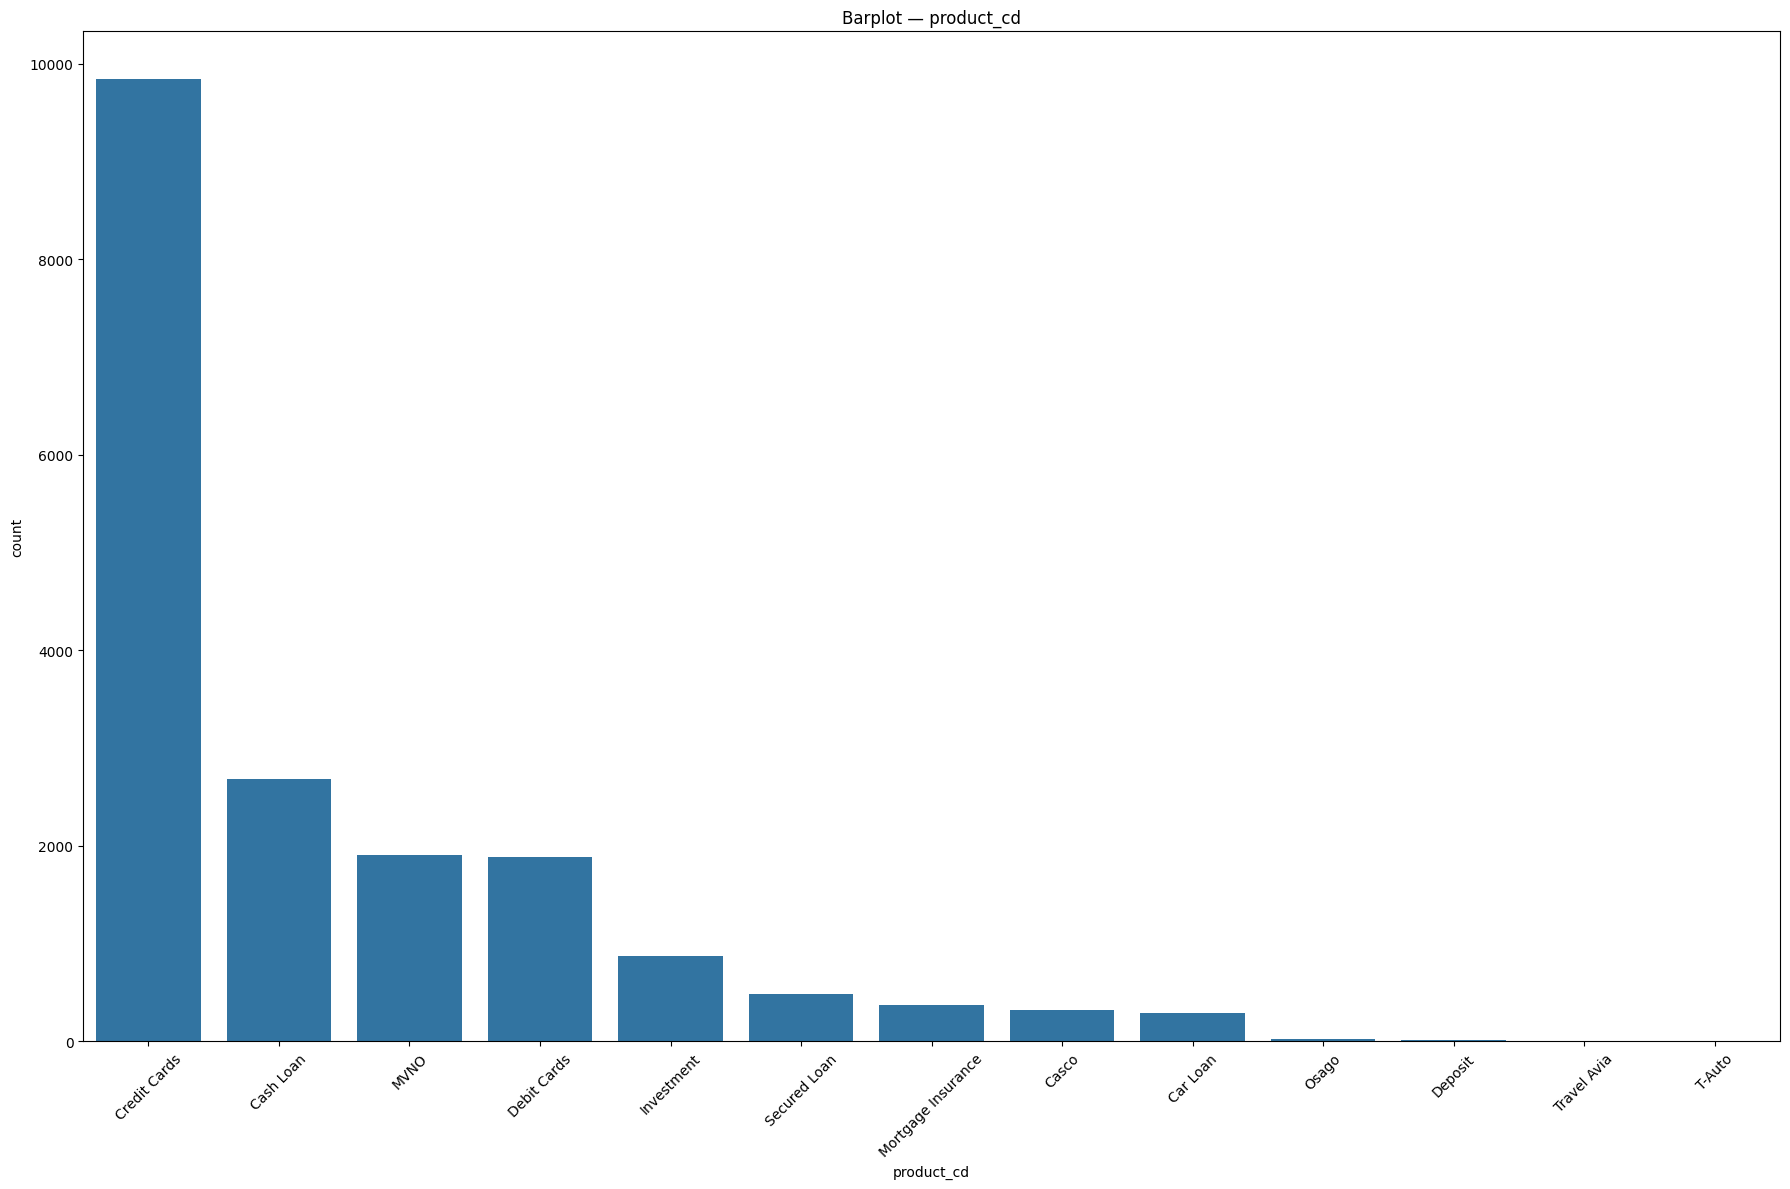


Частоты для категориального признака: functional_cd
functional_cd
Preapprove       9025
Afterfilling     2352
Utilization      1717
Cold             1537
Upsell           1342
Meeting          1064
Agreement         547
Incoming          361
Downsell          229
Reutilization     228
Activation         96
BAF                85
Prolongation       49
Autoleads          47
Deposit            11
Refinancing         1
Name: count, dtype: int64


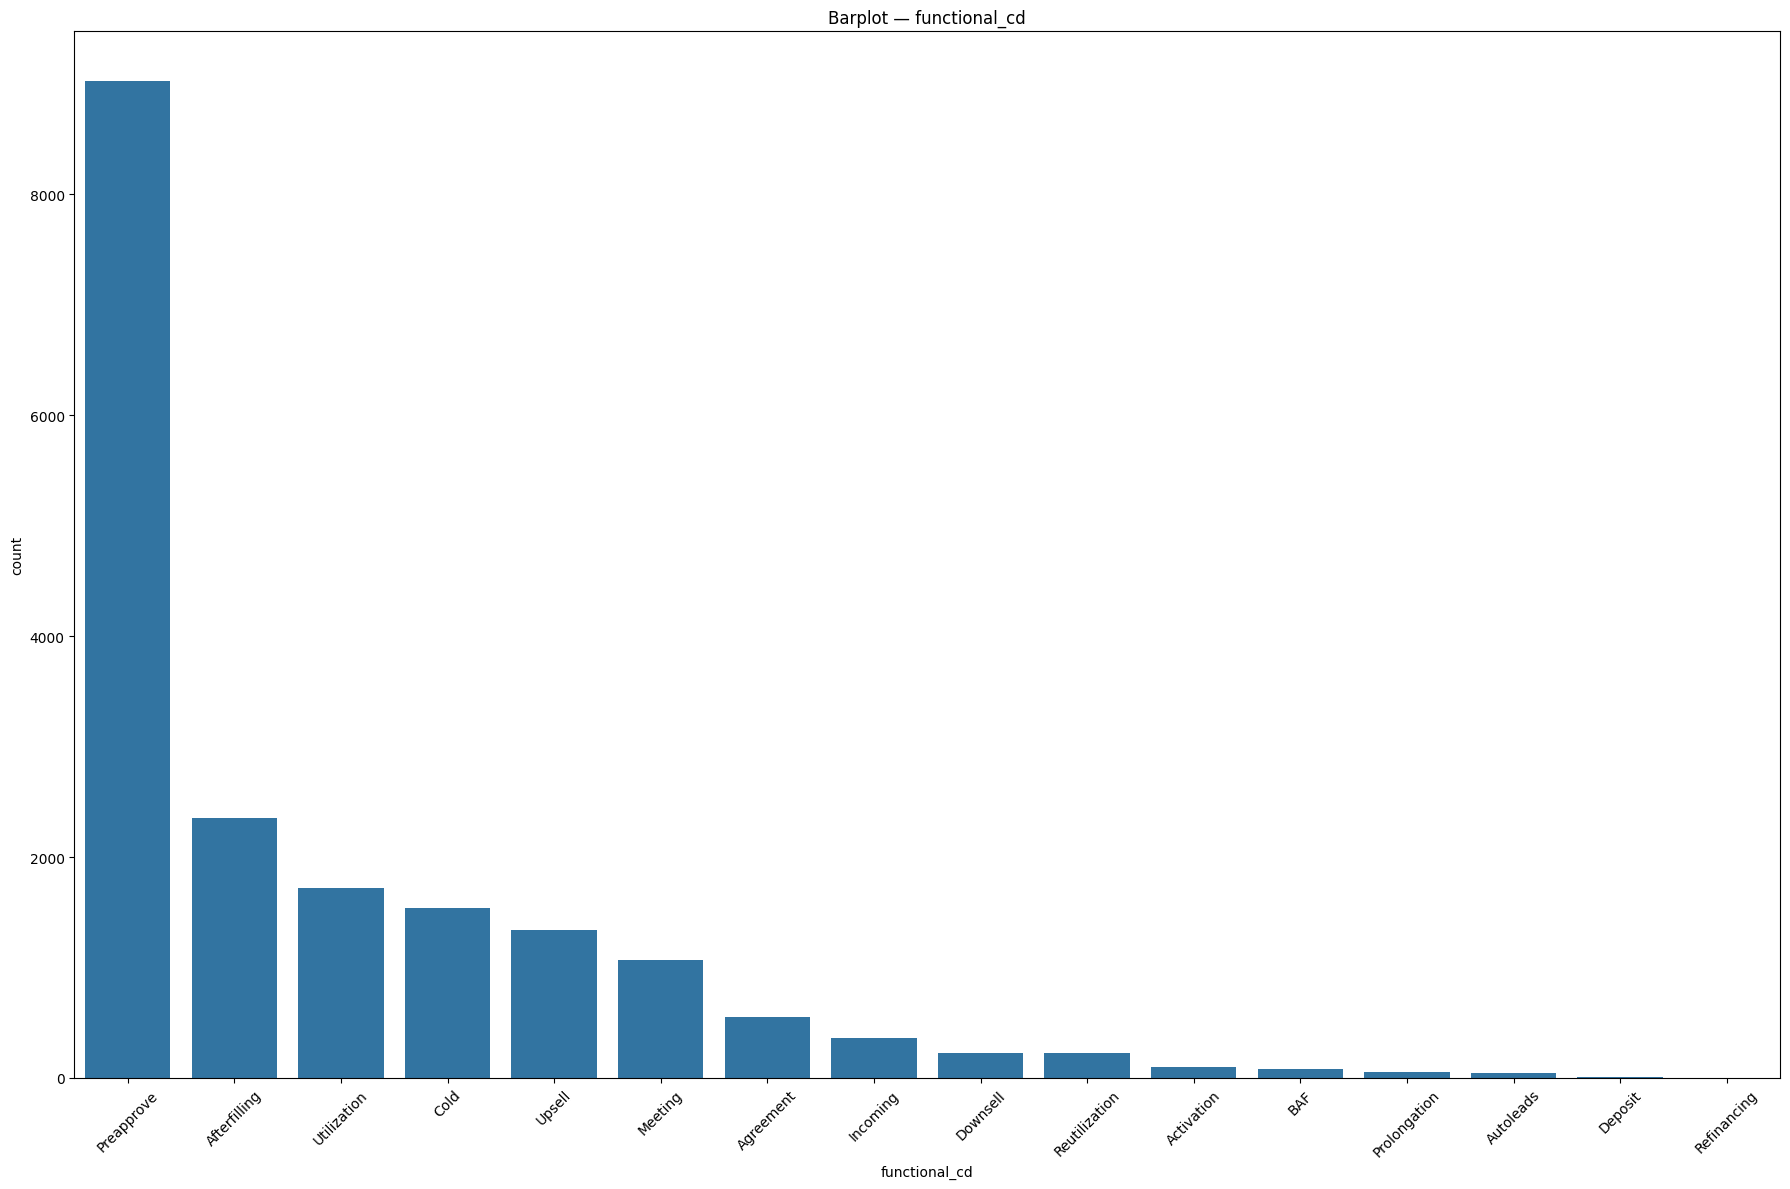


Частоты для категориального признака: wo_hit_status_result_desc
wo_hit_status_result_desc
Дозвон, Отказ      16274
Дозвон, Успешно     2417
Name: count, dtype: int64


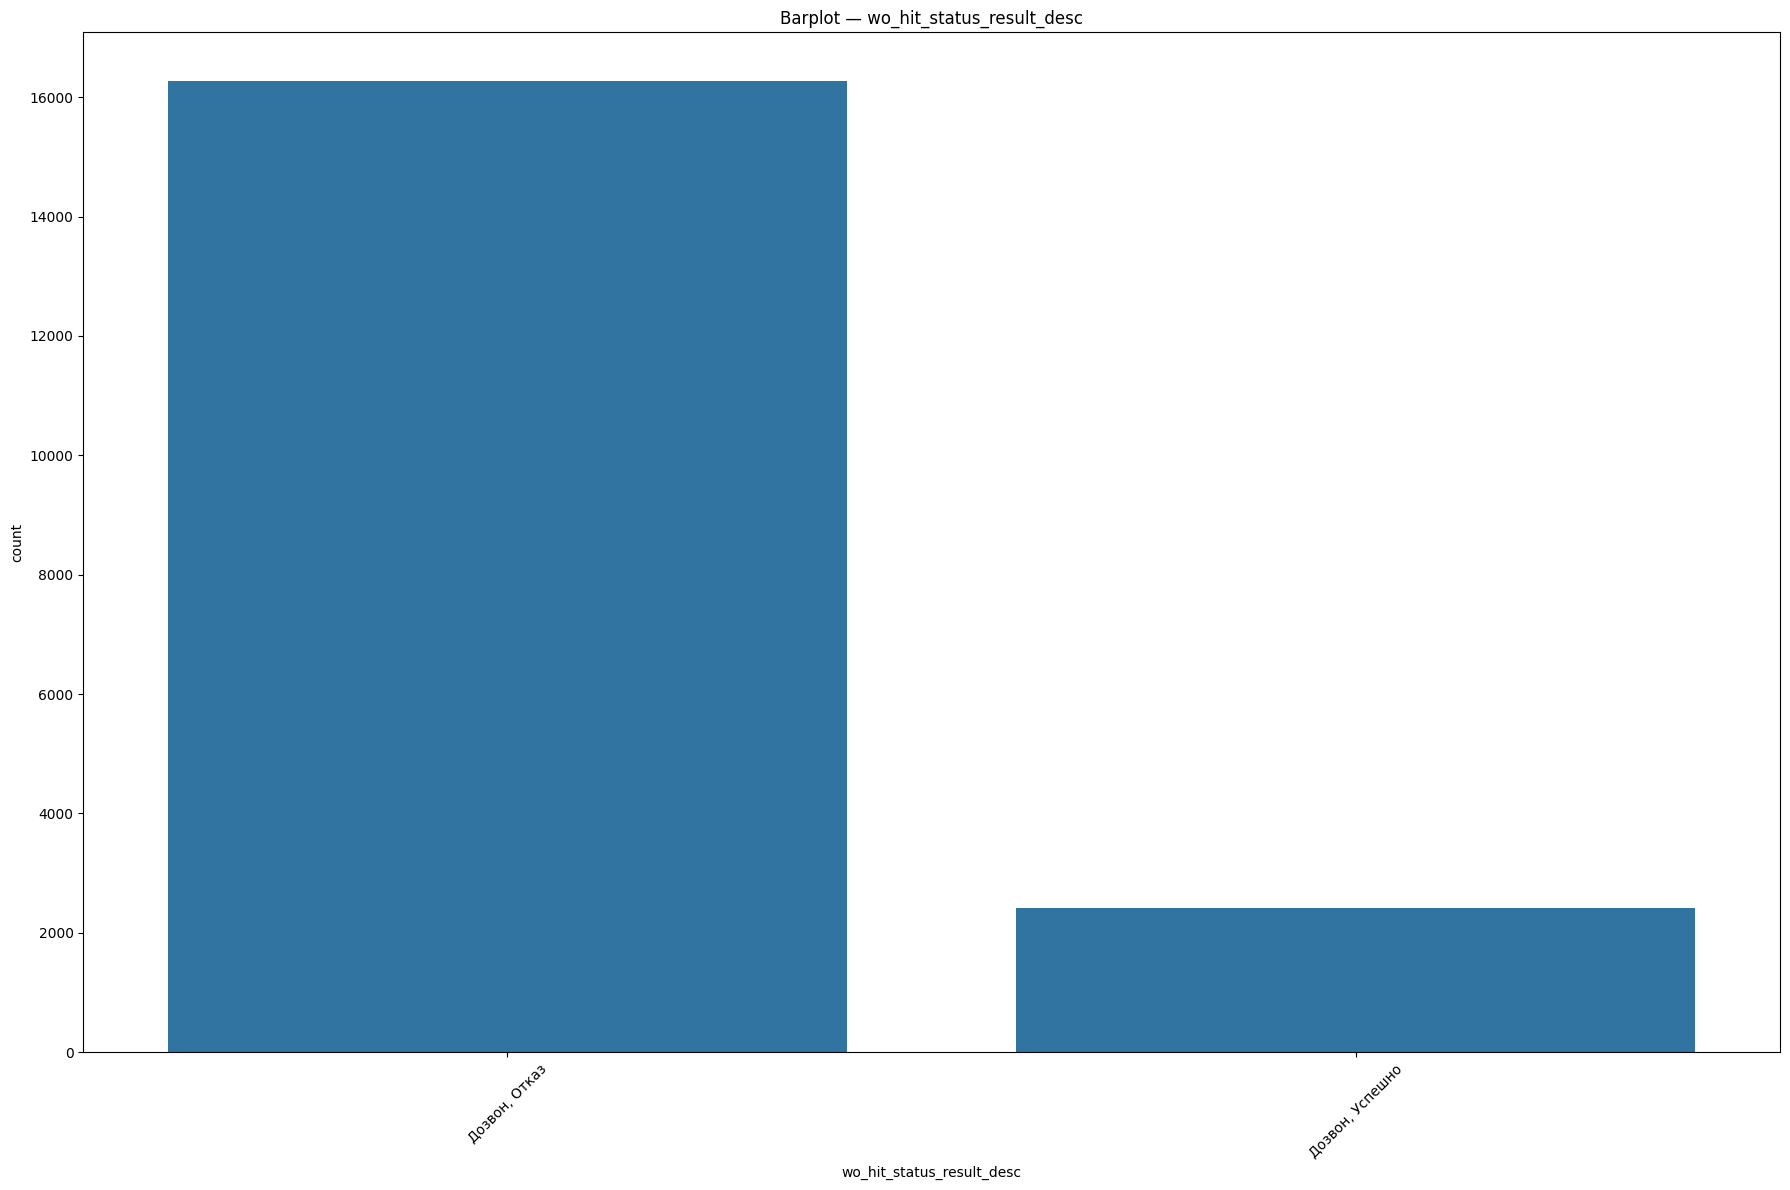


Частоты для категориального признака: wo_hit_status_reason_desc
wo_hit_status_reason_desc
Кредитная карта не нужна                            3870
Отказ прослушать предложение                        2593
Другое                                              1949
Кредит уже не нужен                                 1645
Назначена встреча                                   1282
                                                    ... 
Собственники дети                                      1
Другое                                                 1
Готов использовать карту. Осуществлен перевыпуск       1
Человек не участвовал в Дано                           1
Дорого/Не интересно платное ГО                         1
Name: count, Length: 278, dtype: int64


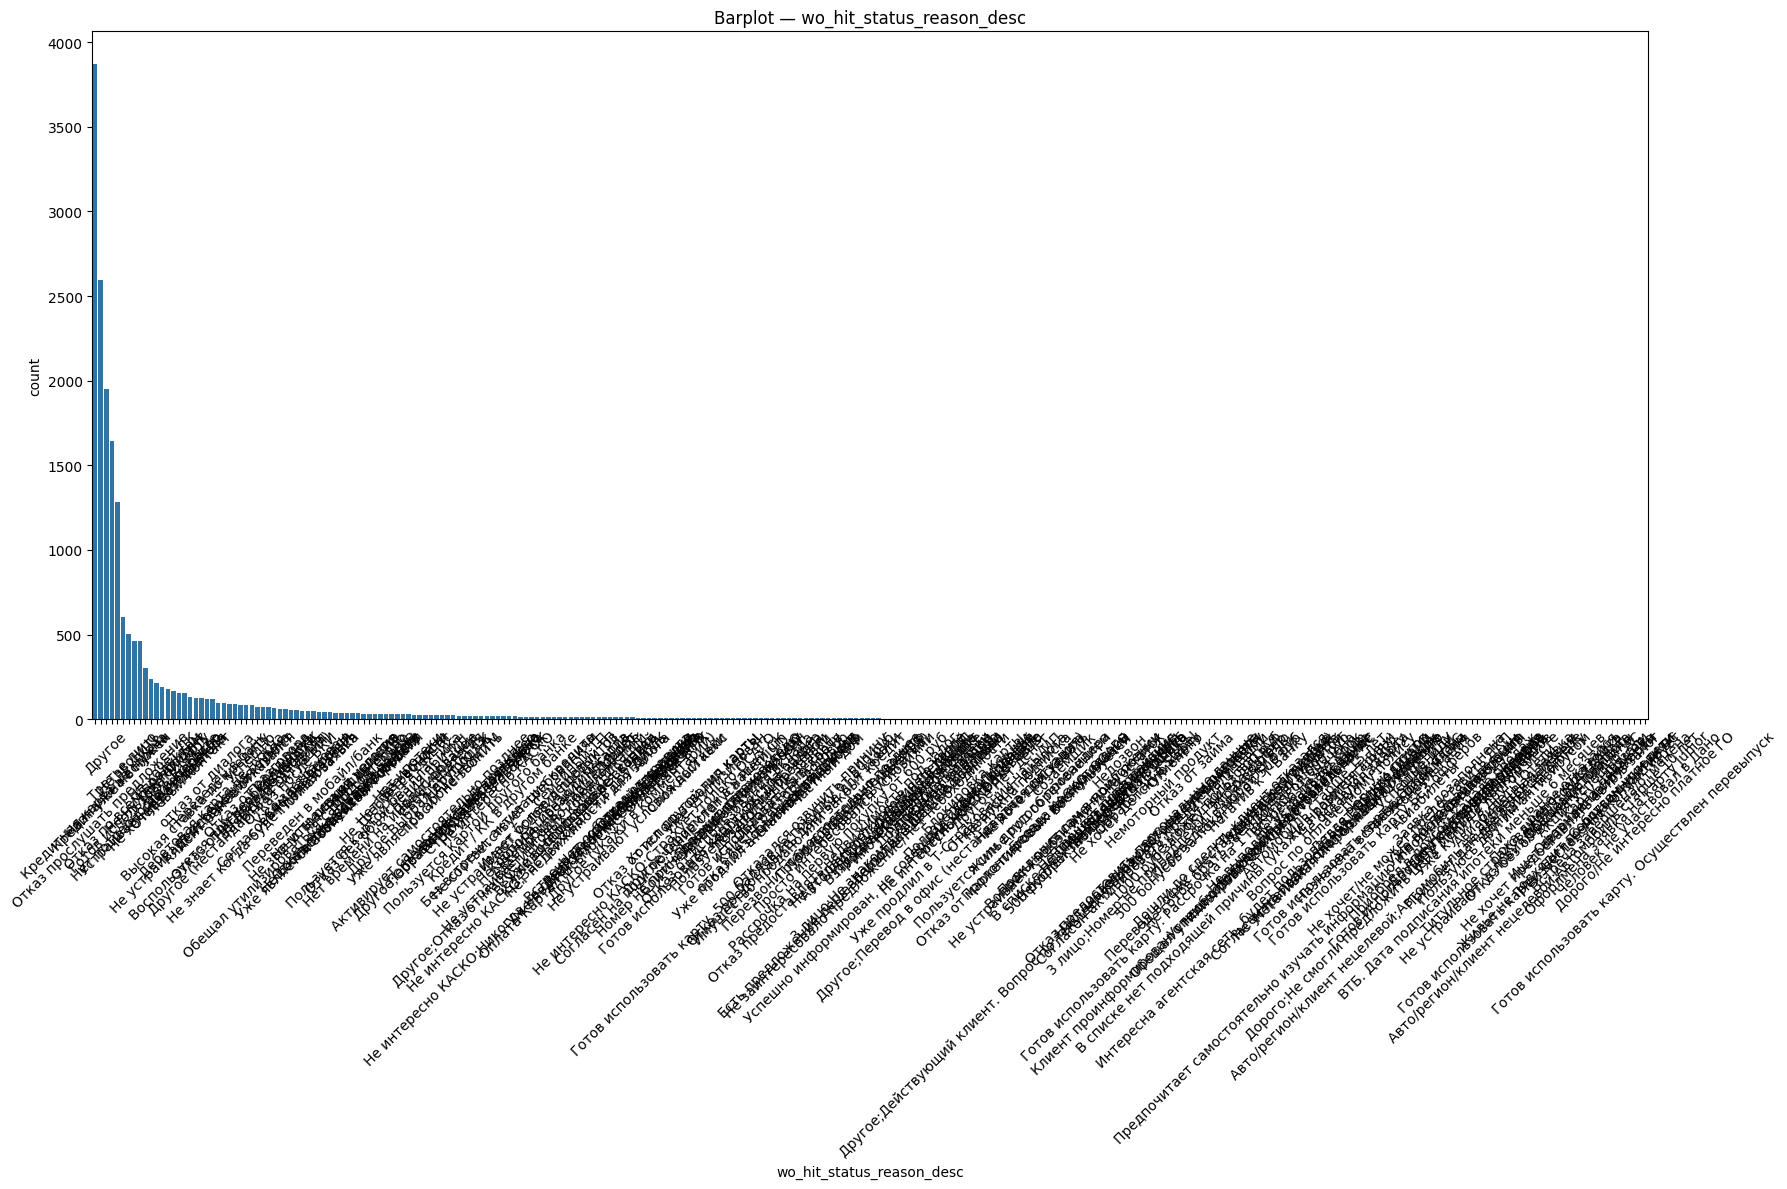


Частоты для категориального признака: emp_gender_cd
emp_gender_cd
W    13483
M     3028
Name: count, dtype: int64


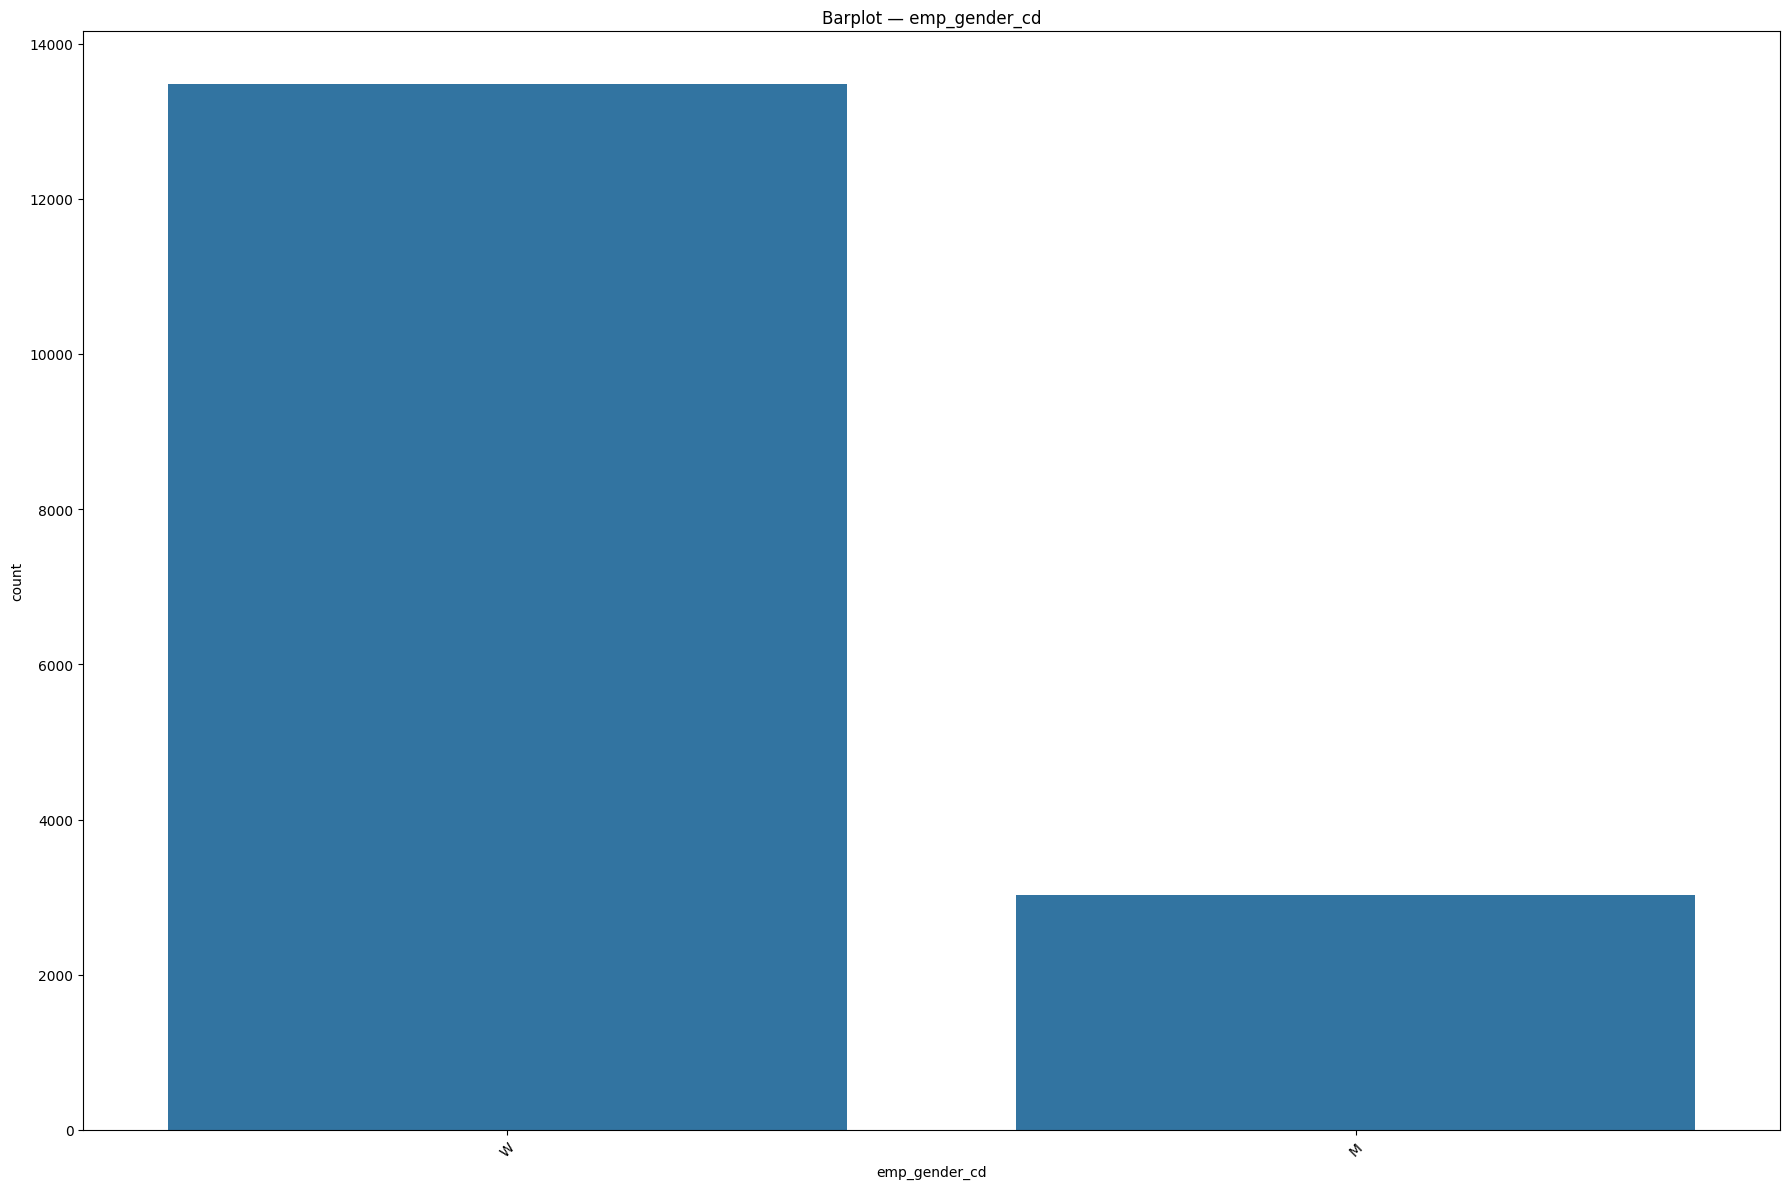


Частоты для категориального признака: emp_citizenship_country_cd
emp_citizenship_country_cd
RUS    6203
BEL       1
Name: count, dtype: int64


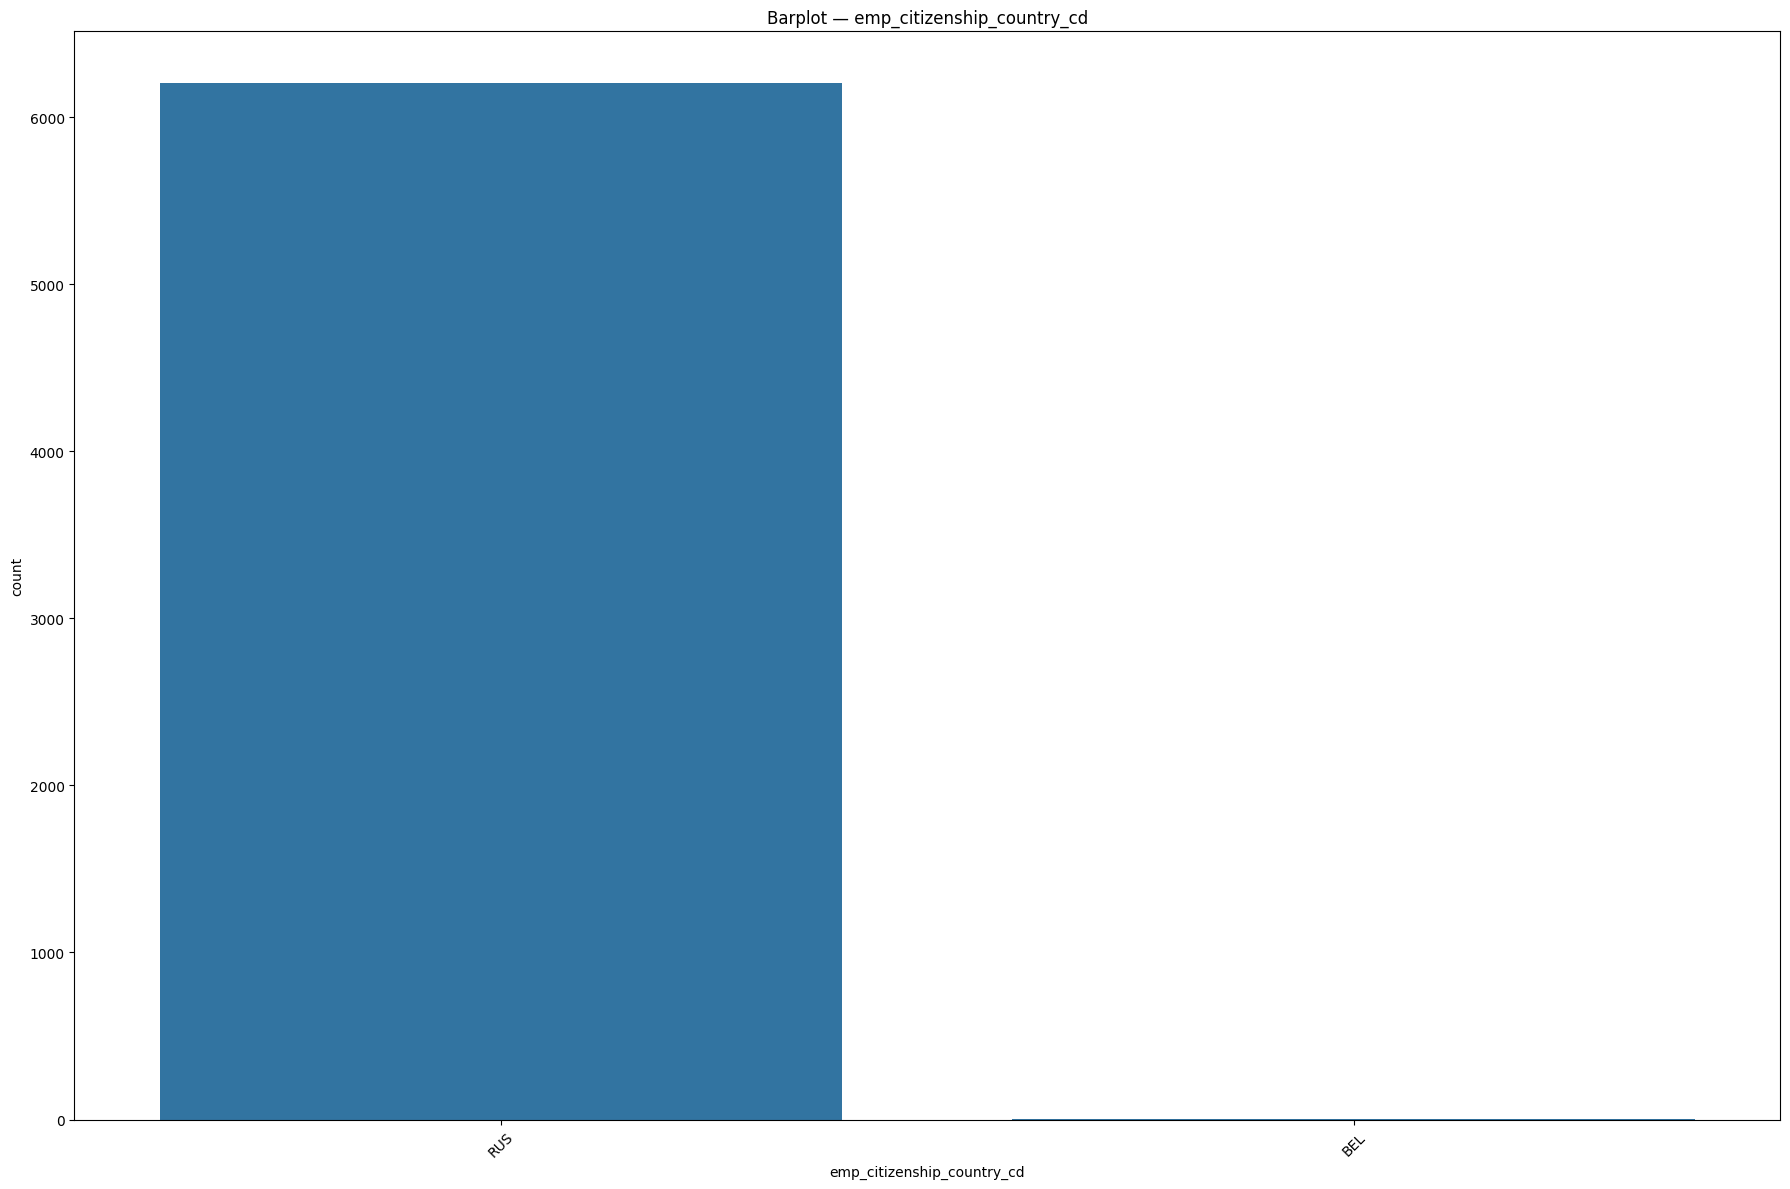


Частоты для категориального признака: emp_marital_status_cd
emp_marital_status_cd
UNM    3692
MAR     145
DIV      29
Name: count, dtype: int64


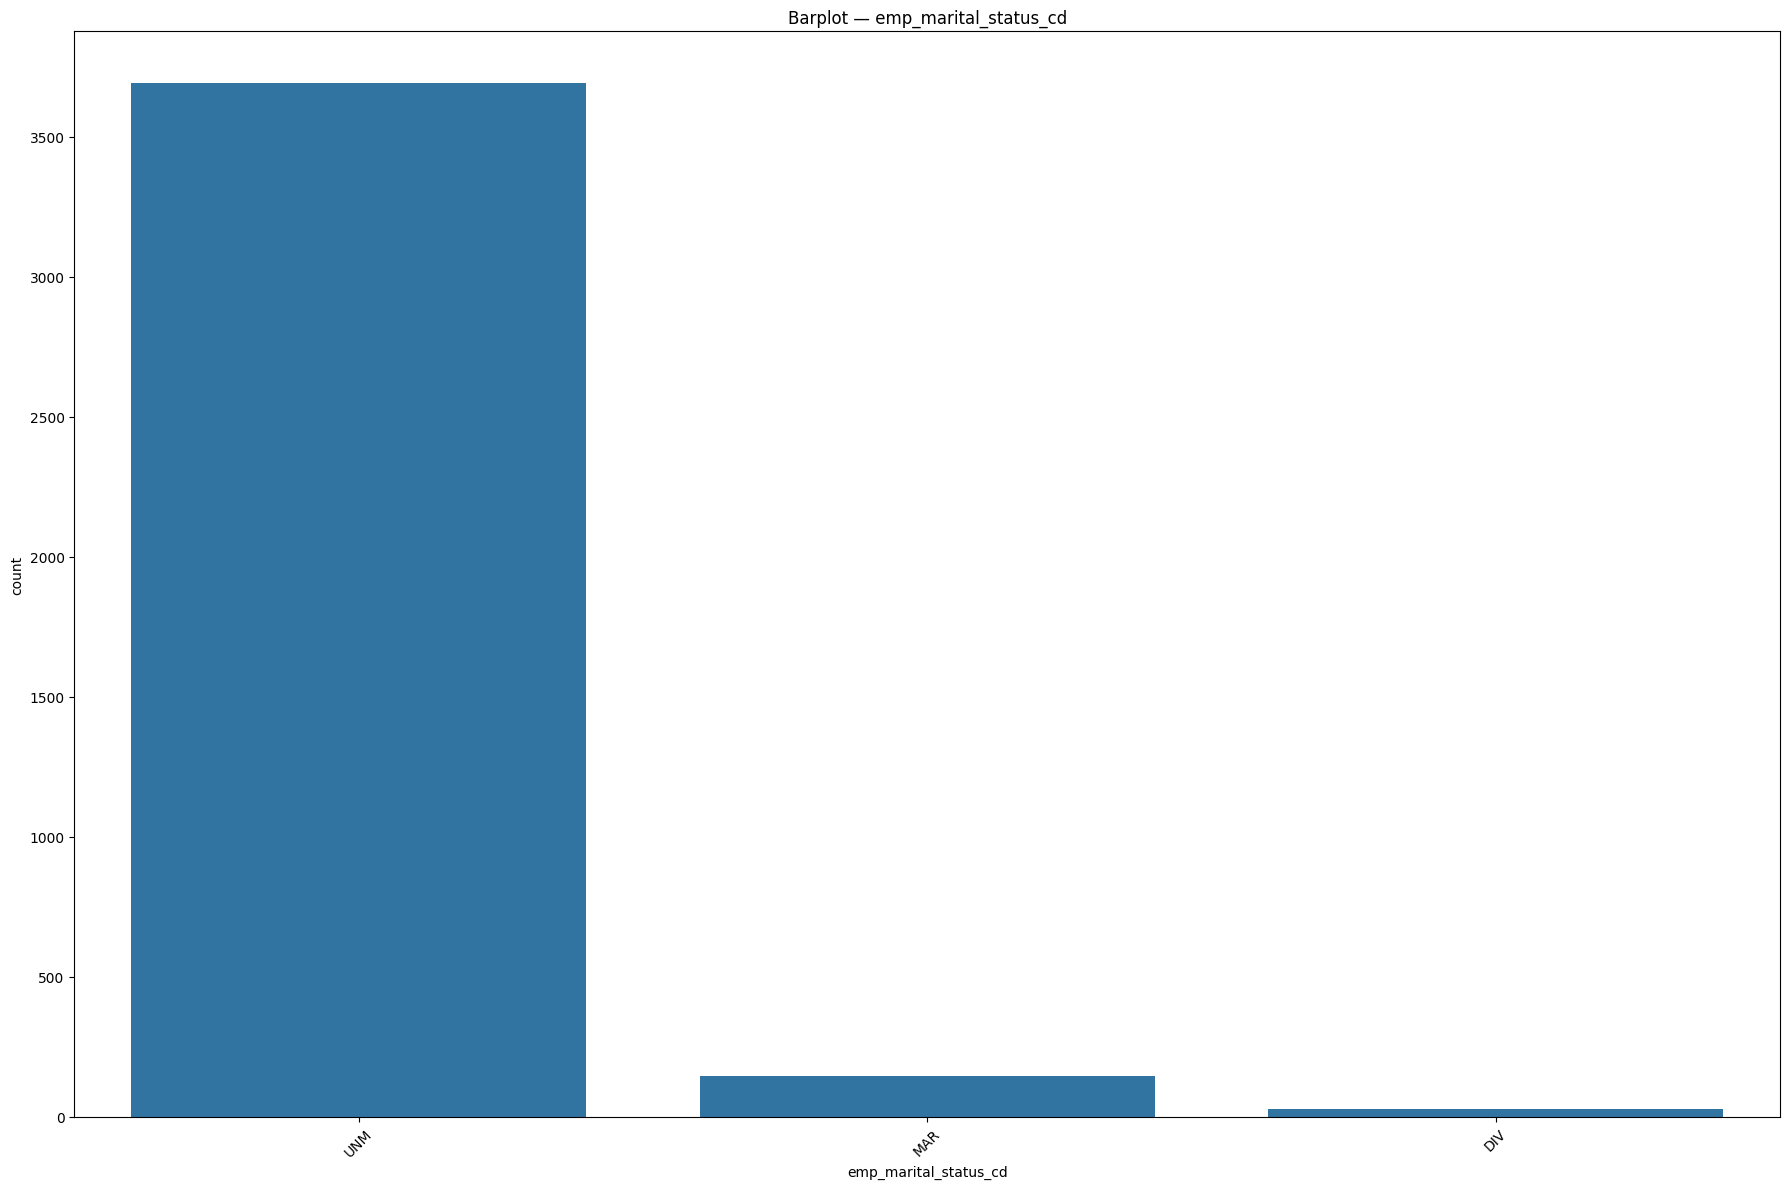


Частоты для категориального признака: year_month
year_month
2024-04    1000
2024-03     923
2024-05     869
2024-02     839
2023-12     837
2023-11     820
2024-01     769
2023-08     767
2024-07     726
2023-10     724
2024-06     713
2023-07     628
2023-06     626
2024-08     600
2023-03     577
2023-05     575
2023-09     567
2024-10     565
2024-09     517
2023-04     495
2022-12     480
2022-08     426
2023-02     414
2022-09     389
2023-01     369
2022-11     365
2022-07     351
2022-10     342
2022-02     306
2022-01     295
2022-06     240
2022-05     212
2022-04     175
2022-03     123
2024-11      67
Name: count, dtype: int64


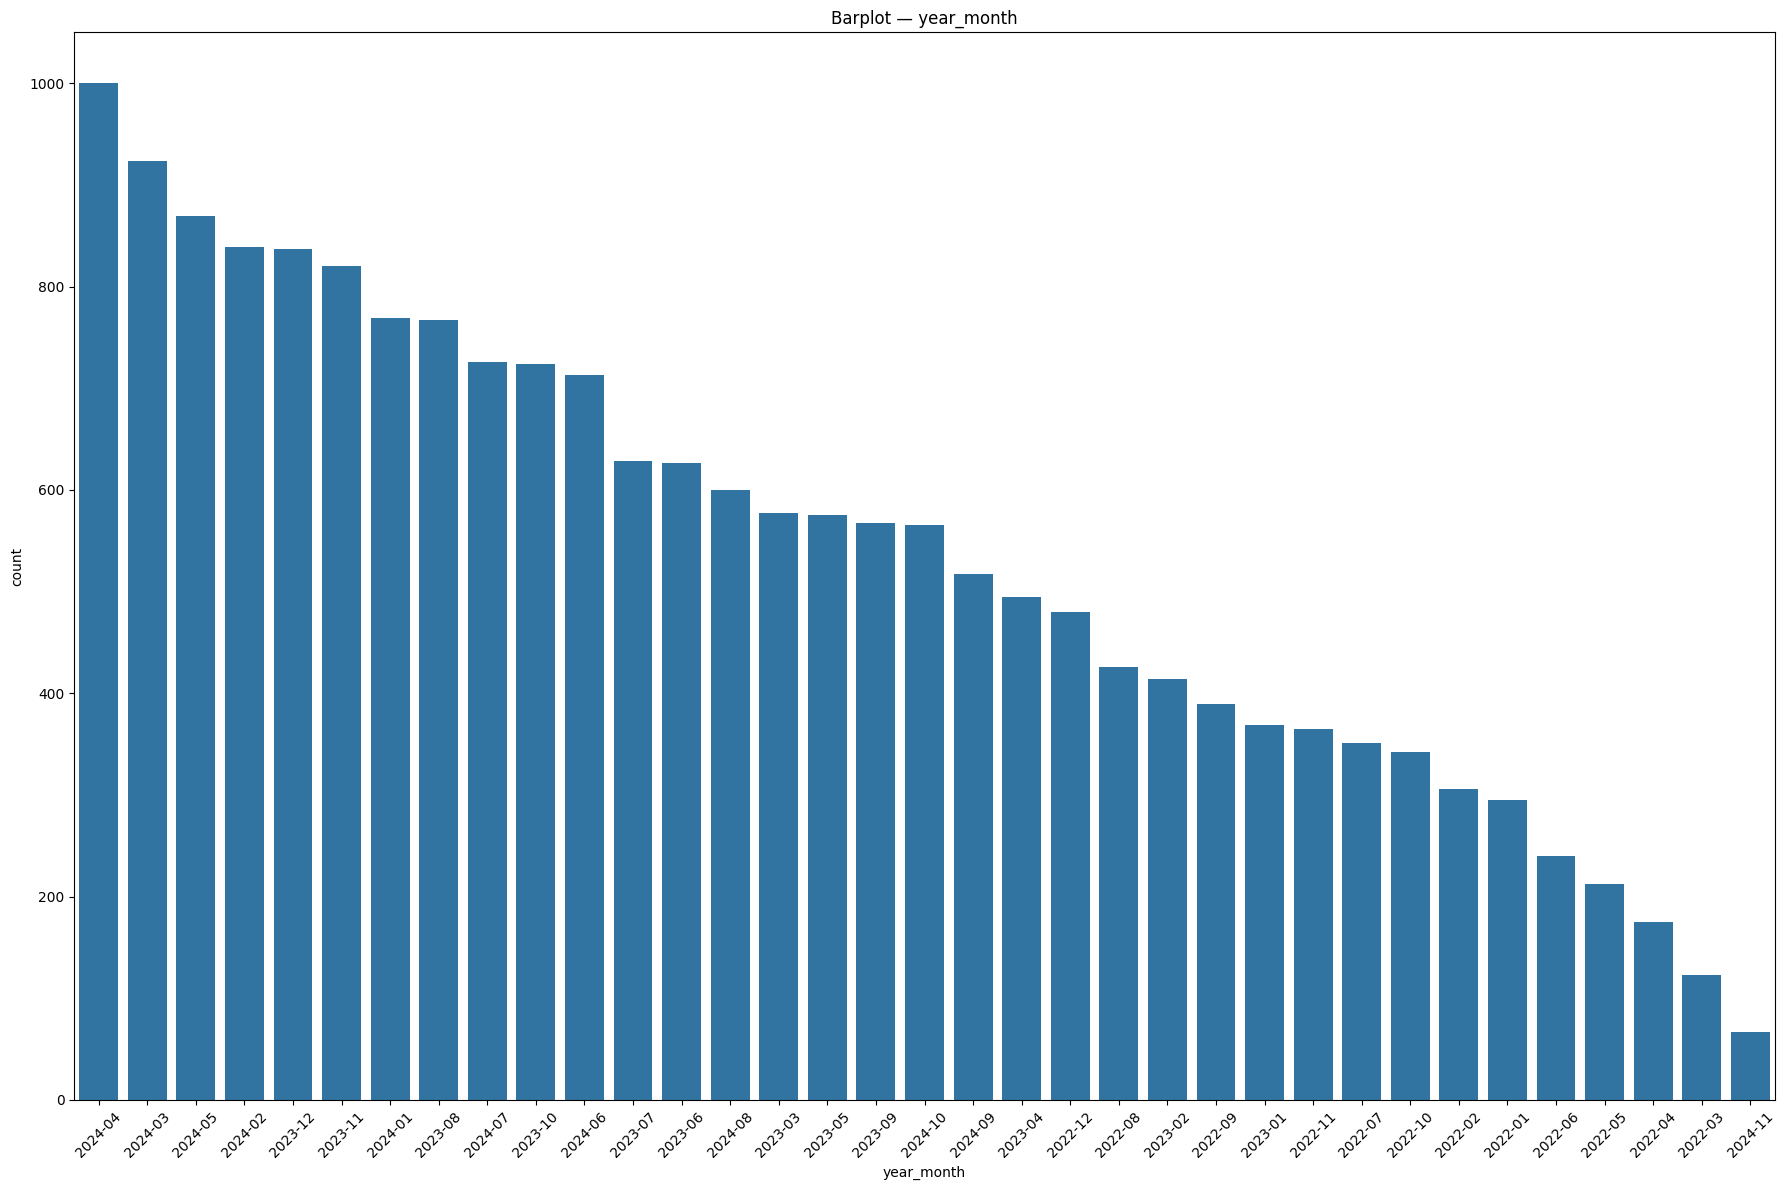

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nЧастоты для категориального признака: {col}")
    print(data[col].value_counts())

    plt.figure(figsize=(18, 12))
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.title(f"Barplot — {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Корреляционная матрица:


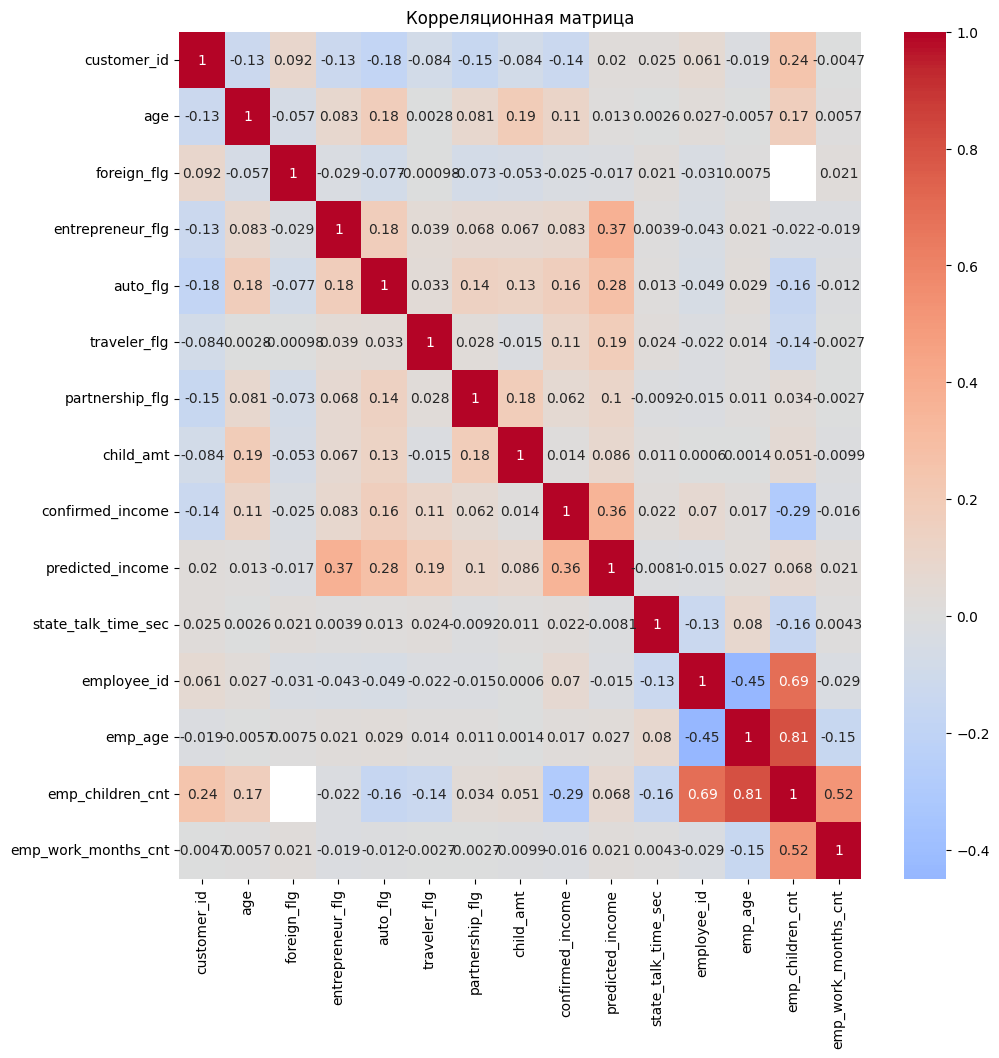

In [ ]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(11, 11))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Корреляционная матрица")
plt.show()

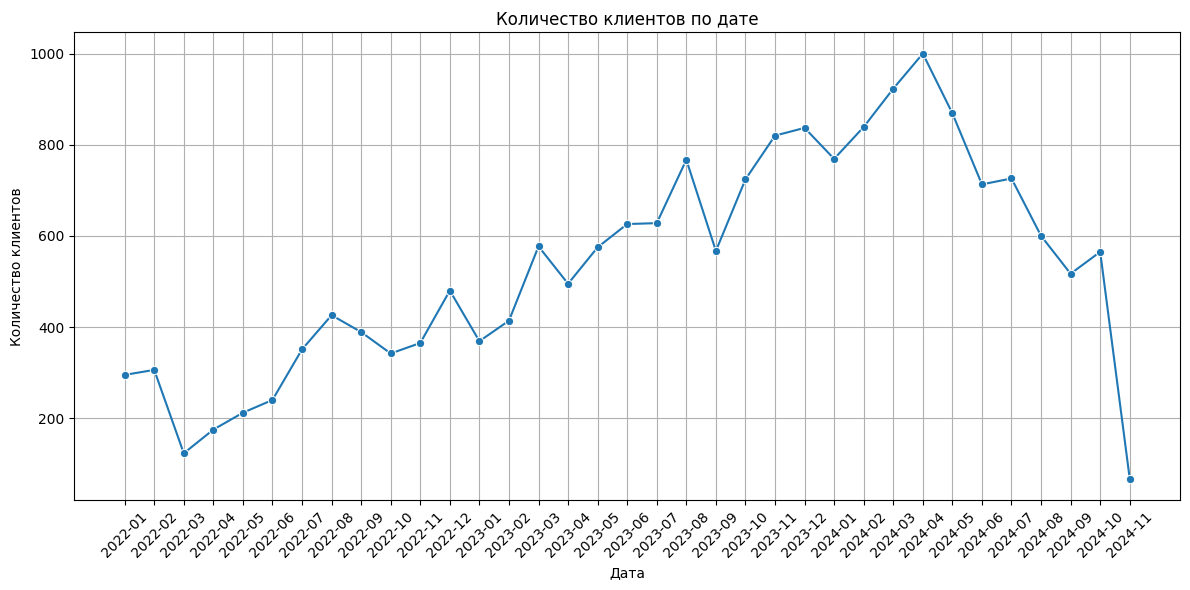

In [ ]:
data['year_month'] = data['finish_dttm'].dt.strftime('%Y-%m')
grouped = data.groupby('year_month')['customer_id'].count().reset_index()
grouped.rename(columns={'customer_id': 'client_count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_month', y='client_count', marker='o')
plt.title("Количество клиентов по дате")
plt.xlabel("Дата")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#Поля для доп исследований
predicted_income                     
entrepreneur_flg
partnership_flg  
child_amt
confirmed_income   
state_talk_time_sec
wo_hit_status_result_desc
wo_hit_status_reason_desc  
customer_id
finish_dttm

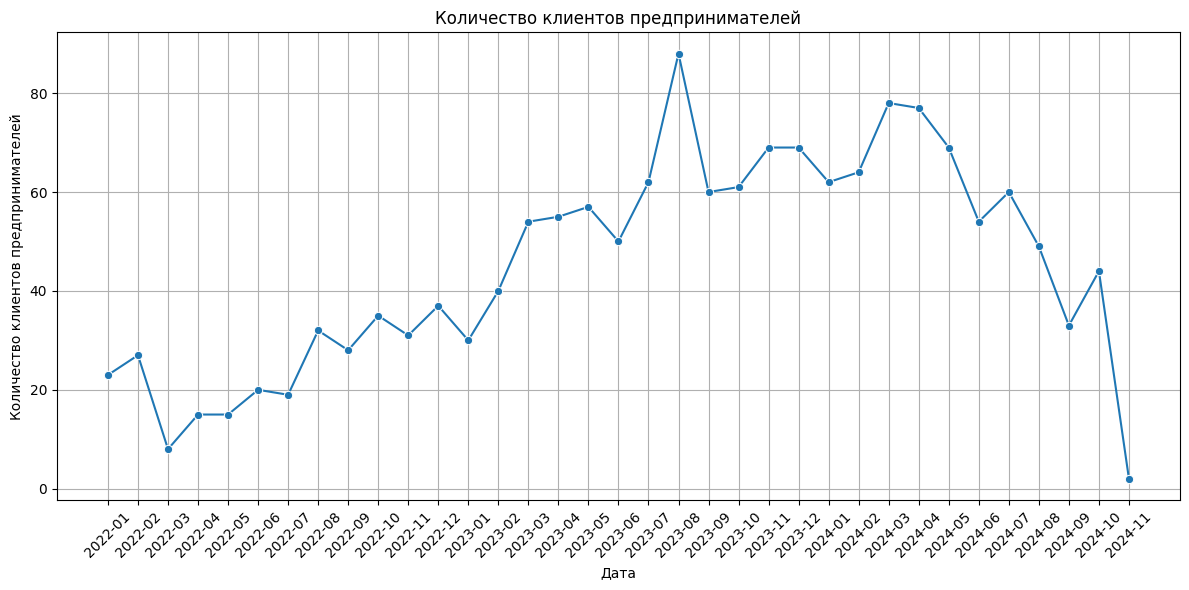

In [ ]:
data['year_month'] = data['finish_dttm'].dt.strftime('%Y-%m')

grouped = data.query('entrepreneur_flg == 1').groupby('year_month')['customer_id'].count().reset_index()
grouped.rename(columns={'customer_id': 'client_count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_month', y='client_count', marker='o')
plt.title("Количество клиентов предпринимателей")
plt.xlabel("Дата")
plt.ylabel("Количество клиентов предпринимателей")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


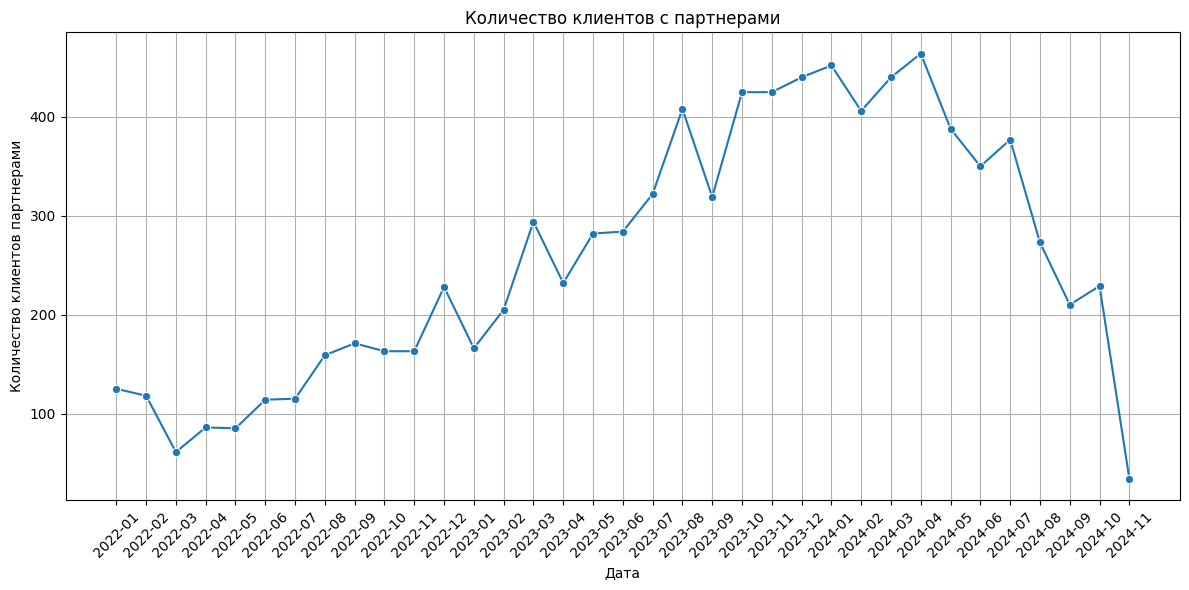

In [ ]:
data['year_month'] = data['finish_dttm'].dt.strftime('%Y-%m')

grouped = data.query(' partnership_flg == 1').groupby('year_month')['customer_id'].count().reset_index()
grouped.rename(columns={'customer_id': 'client_count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_month', y='client_count', marker='o')
plt.title("Количество клиентов с партнерами")
plt.xlabel("Дата")
plt.ylabel("Количество клиентов партнерами")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


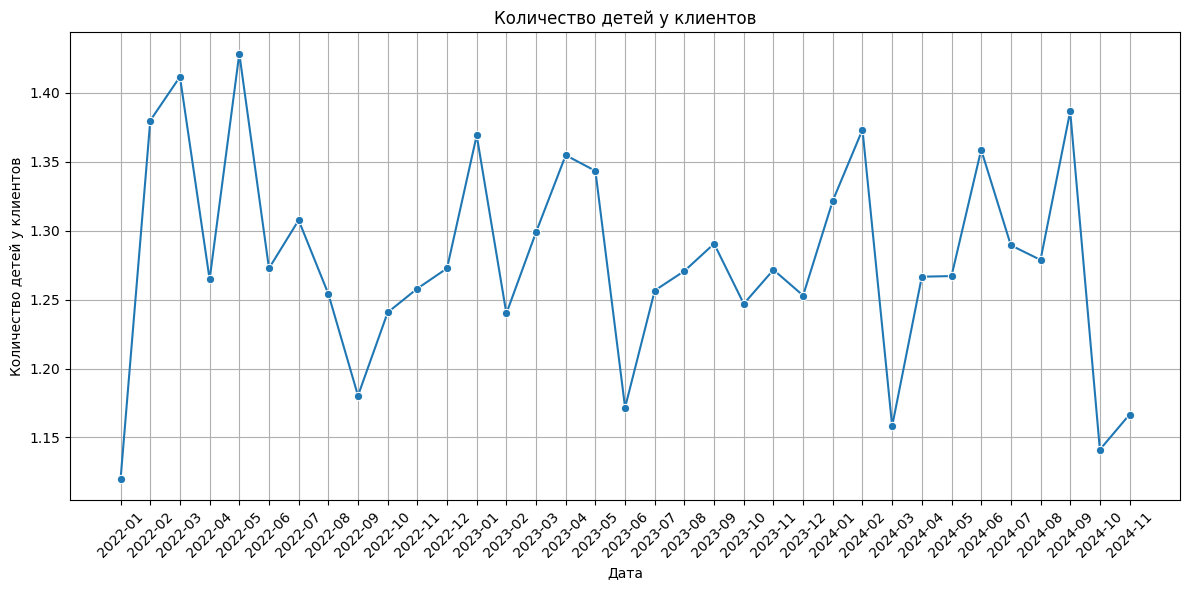

In [ ]:

data['year_month'] = data['finish_dttm'].dt.strftime('%Y-%m')

grouped = data.query('child_amt >= 1').groupby('year_month')['child_amt'].mean().reset_index()
grouped.rename(columns={'child_amt': 'avg_child_amt'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_month', y='avg_child_amt', marker='o')
plt.title("Количество детей у клиентов")
plt.xlabel("Дата")
plt.ylabel("Количество детей у клиентов")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


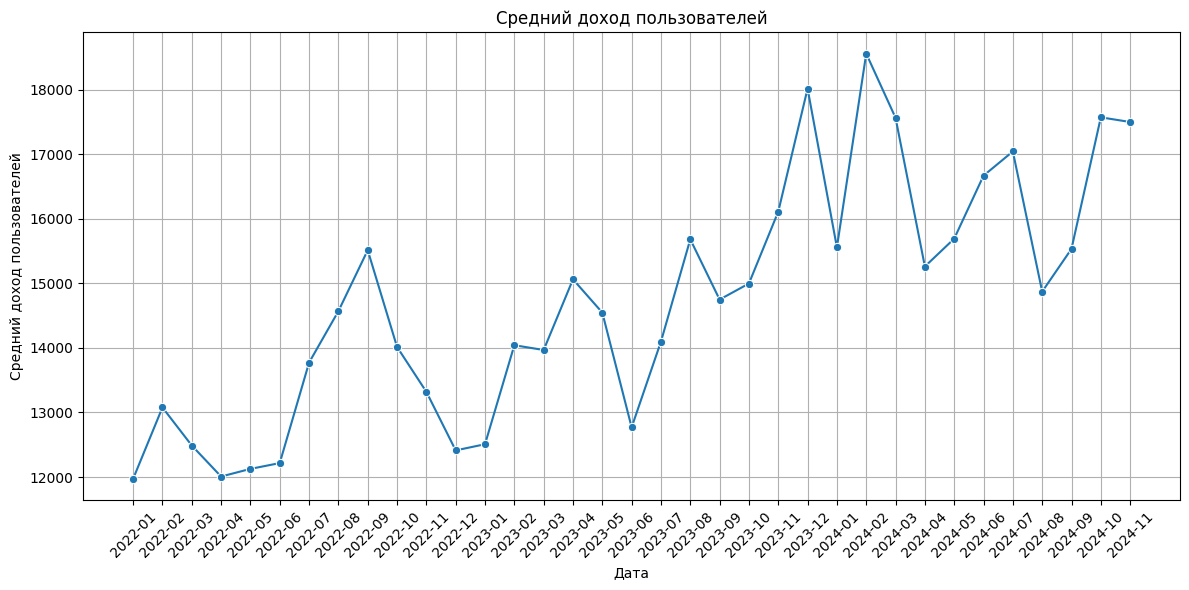

In [ ]:
data['year_month'] = data['finish_dttm'].dt.strftime('%Y-%m')

grouped = data.groupby('year_month')['confirmed_income'].mean().reset_index()
grouped.rename(columns={'confirmed_income': 'avg_confirmed_income'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_month', y='avg_confirmed_income', marker='o')
plt.title("Средний доход пользователей")
plt.xlabel("Дата")
plt.ylabel("Средний доход пользователей")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-28-1e2b4651d6b5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['year_month'] = trimmed_data['finish_dttm'].dt.strftime('%Y-%m')


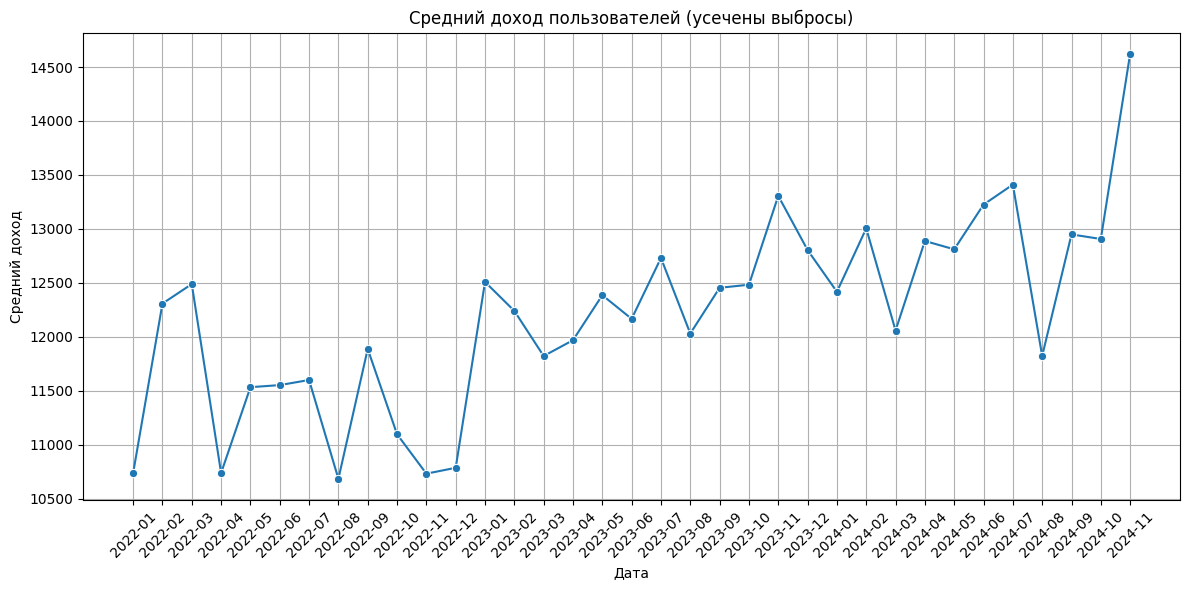

In [ ]:
data['confirmed_income'] = pd.to_numeric(data['confirmed_income'], errors='coerce')

lower = data['confirmed_income'].quantile(0.05)
upper = data['confirmed_income'].quantile(0.85)

trimmed_data = data[(data['confirmed_income'] >= lower) & (data['confirmed_income'] <= upper)]
trimmed_data['year_month'] = trimmed_data['finish_dttm'].dt.strftime('%Y-%m')
grouped = trimmed_data.groupby('year_month')['confirmed_income'].mean().reset_index()
grouped.rename(columns={'confirmed_income': 'avg_confirmed_income'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_month', y='avg_confirmed_income', marker='o')
plt.title("Средний доход пользователей (усечены выбросы)")
plt.xlabel("Дата")
plt.ylabel("Средний доход")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


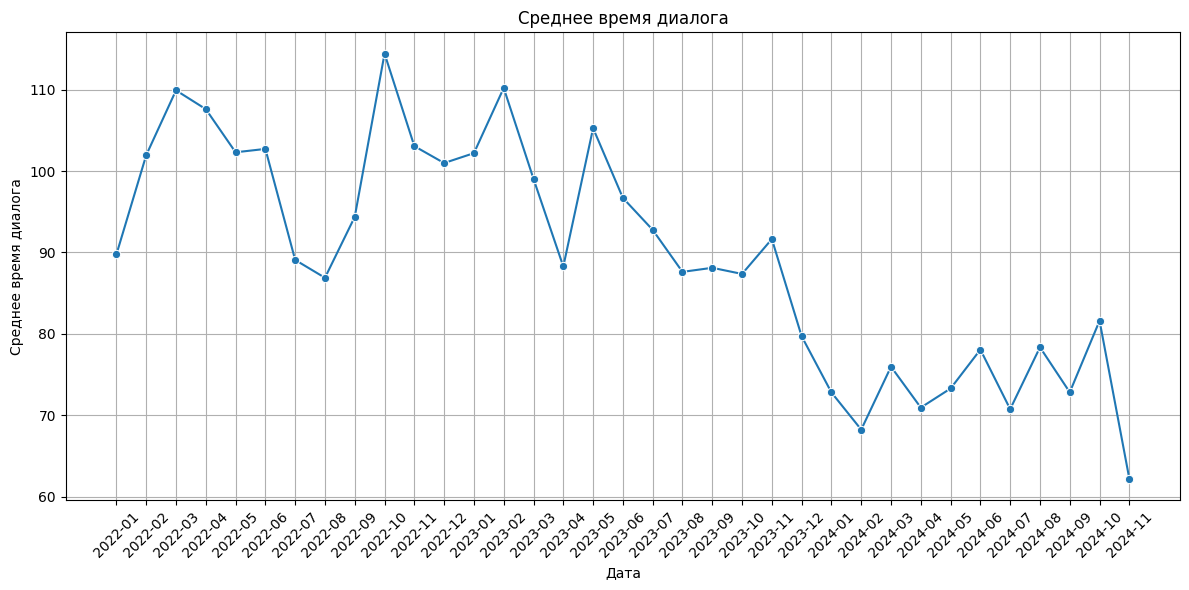

In [ ]:
data['year_month'] = data['finish_dttm'].dt.strftime('%Y-%m')


grouped = data.groupby('year_month')['state_talk_time_sec'].mean().reset_index()
grouped.rename(columns={'state_talk_time_sec': 'avg_state_talk_time_sec'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_month', y='avg_state_talk_time_sec', marker='o')
plt.title("Среднее время диалога")
plt.xlabel("Дата")
plt.ylabel("Среднее время диалога")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
filtered = data.query('wo_hit_status_result_desc == "Дозвон, Отказ"')

top_reasons = filtered['wo_hit_status_reason_desc'].value_counts().reset_index()

top_reasons.columns = ['reason', 'count']
print(top_reasons.head(10))


                         reason  count
0      Кредитная карта не нужна   3870
1  Отказ прослушать предложение   2593
2                        Другое   1935
3           Кредит уже не нужен   1645
4                   Третье лицо    604
5                    Не звонить    504
6       Отказ по всем продуктам    462
7     Нет потребности в кредите    301
8      Устраивает свой оператор    238
9              Не нужен продукт    212


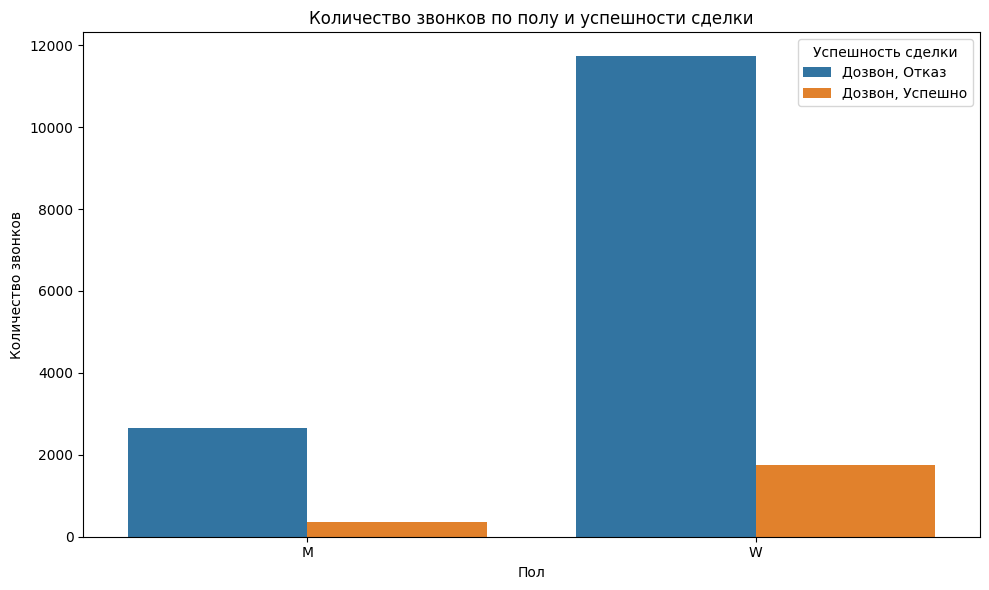

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped = data.groupby(['emp_gender_cd', 'wo_hit_status_result_desc']).size().reset_index(name='call_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='emp_gender_cd', y='call_count', hue='wo_hit_status_result_desc')
plt.title("Количество звонков по полу и успешности сделки")
plt.xlabel("Пол")
plt.ylabel("Количество звонков")
plt.legend(title='Успешность сделки')
plt.tight_layout()
plt.show()


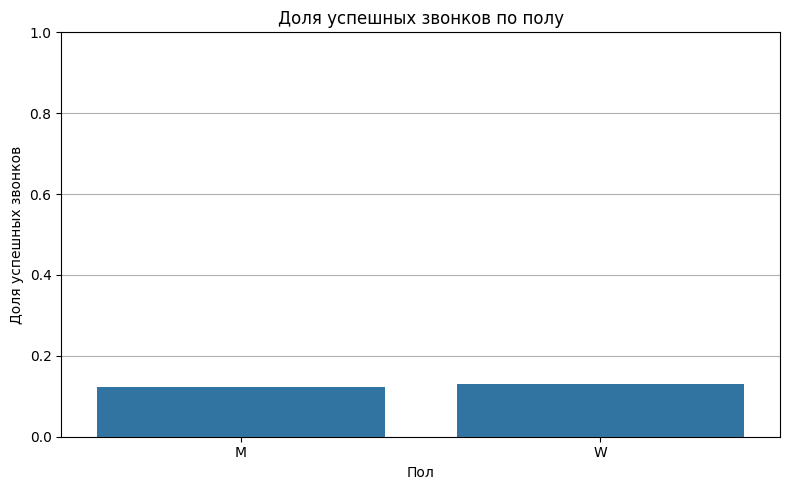

In [ ]:
grouped = data.groupby(['emp_gender_cd', 'wo_hit_status_result_desc']).size().reset_index(name='call_count')
total_by_gender = grouped.groupby('emp_gender_cd')['call_count'].transform('sum')
grouped['success_ratio'] = grouped['call_count'] / total_by_gender
success_ratios = grouped[grouped['wo_hit_status_result_desc'] == 'Дозвон, Успешно']


plt.figure(figsize=(8, 5))
sns.barplot(data=success_ratios, x='emp_gender_cd', y='success_ratio')
plt.title("Доля успешных звонков по полу")
plt.xlabel("Пол")
plt.ylabel("Доля успешных звонков")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
